# **IMPORTANDO DE BIBLIOTECAS**



In [2]:
# Importando bibliotecas
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from   sklearn.linear_model import LinearRegression
from   sklearn.metrics import r2_score
import statsmodels.api as sm
import os
import scipy.stats as stats
import math
import pylab as pl
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import lilliefors


# **ANÁLISE EXPLORATÓRIA DE DADOS**

## **TRATAMENTO DE DADOS**

Como padrão, este trabalho adota que pelo menos 60% dos dados de uma variável não estejam faltantes (NA). Ainda com uma margem bem grande, o objetivo é evitar interpretações errôneas de medidas centrais ou visuais.

In [3]:
# TRATAMENTO DE DADOS
df = pd.read_csv('/content/dadabrutos_D_.csv') # leitura de database
df['Datein'] = pd.to_datetime(df['Datein'], errors = 'coerce') # Transformo Datein de object para datetime64[ns]

# Cálculo de procentagem de dados não faltantes no dataframe
nonfalt = [((df['FR(m3/dia)'].count())/1430),((df['BODin (ppm)'].count())/1430),((df['CODin (ppm)'].count())/1430),((df['SSin(ppm)'].count())/1430),
           ((df['pHin'].count())/1430),((df['NAmin(ppm)'].count())/1430),((df['NNin (ppm)'].count())/1430),((df['Pin (ppm)'].count())/1430),
           ((df['Colin(ppm)'].count())/1430),((df['Tin(°C)'].count())/1430),((df['Condin L1'].count())/1430),((df['RF(mm)'].count())/1430),
           ((df['Pulp(ton/dia)'].count())/1430),((df['Pap (ton/dia)'].count())/1430),((df['BODout(ppm)'].count())/1430),((df['CODout (ppm)'].count())/1430),
           ((df['SSout(ppm)'].count())/1430),((df['Colout(ppm)'].count())/1430),((df['Tout(°C)'].count())/1430),((df['Condout'].count())/1430),
           ((df['FRout(m3/dia)'].count())/1430),((df['FRmod(m3/dia)'].count())/1430)]

As variáveis que foram retiradas por estarem abaixo do limite definido são:

*   SSin (ppm) = 0.3972027972027972 ≅ 39.72%
*   NAmin(ppm) = 0.46153846153846156 ≅ 46.15%
*   NNin (ppm) =  0.1951048951048951 ≅ 19.51%
*   Pin (ppm) =  0.18181818181818182 ≅ 18.18%
*   SSout(ppm) = 0.13426573426573427 ≅ 13.43%











In [4]:
df = df.drop(['Unnamed: 0', '...16', 'SSout(ppm)', 'Pin (ppm)', 'NNin (ppm)', 'NAmin(ppm)', 'SSin(ppm)', 'Dateout' ], axis = 1) # Exclui colunas descartadas na análise
df = df.dropna(subset=['BODin (ppm)', 'BODout(ppm)']) # Deleta NA das colunas BODin e BODout

# display(df)
# print(df.info(null_counts = True))

## **MEDIDAS ESTATÍSTICAS PARA VARIÁVEIS (CONTAGEM, MÉDIA, DESVIO PADRÃO, MIN, MAX, QUARTIS)**

In [5]:
df = df[(df['Pulp(ton/dia)'] != -48) & (df['Pulp(ton/dia)'] != -37)] #  Elimina valores negativos em pulp
df = df[(df['pHin'] >= 4.22)] # Remove valor aberrante do pH
describe = df.describe(percentiles=[.25, .5, .75]) #Cria dataframe com medidas estatísticas

display(describe) # Mostra o dataframe



FR(m3/dia)  BODin (ppm)  CODin (ppm)         pHin   Colin(ppm)  \
count   1321.000000  1321.000000  1315.000000  1321.000000  1317.000000   
mean   67442.046934   245.260666   561.928517     7.456747   462.293090   
std    11244.625771    46.383743   104.181302     1.205786   124.080377   
min     5913.000000    41.000000   136.000000     4.220000    41.000000   
25%    61909.000000   219.000000   503.000000     6.830000   389.000000   
50%    66610.000000   245.000000   563.000000     7.110000   474.000000   
75%    76542.000000   271.000000   622.000000     7.470000   530.000000   
max    97850.000000   449.000000   925.000000    12.530000  1317.000000   

          Tin(°C)    Condin L1       RF(mm)  Pulp(ton/dia)  Pap (ton/dia)  \
count  911.000000  1313.000000  1080.000000    1226.000000    1237.000000   
mean    45.408924  1531.458492     4.930185     886.289338    1039.920854   
std      3.078598   382.052321    11.875597     152.678643      94.866938   
min     28.000000   379.000000     0.000000       0.000000     382.400000   
25%     44.000000  1304.000000     0.000000     861.159750    1002.800000   
50%     46.000000  1456.000000     0.100000     919.710500    1053.500000   
75%     47.000000  1670.000000     3.600000     963.965500    1099.000000   
max     50.000000  5810.000000   175.400000    1112.094000    1304.800000   

       BODout(ppm)  CODout (ppm)  Colout(ppm)     Tout(°C)      Condout  \
count  1321.000000   1314.000000  1316.000000  1148.000000  1312.000000   
mean     85.116329    315.455099   413.259878    34.698171  1546.075457   
std      25.396772     73.270908   154.559423     2.280115   301.047233   
min      16.000000    105.000000    32.000000    25.000000   222.000000   
25%      69.000000    281.000000   361.000000    33.000000  1346.000000   
50%      85.000000    312.000000   438.000000    35.000000  1484.500000   
75%     101.000000    350.000000   508.000000    36.500000  1656.250000   
max     187.000000    865.000000   983.000000    39.000000  2890.000000   

       FRout(m3/dia)  FRmod(m3/dia)  
count    1321.000000    1319.000000  
mean    67767.989242   67406.663192  
std     11320.520384   10369.589801  
min      5913.000000   24395.500000  
25%     62115.183500   62042.375000  
50%     66811.000000   66339.250000  
75%     76673.000000   76265.875000  
max    106941.859000   85809.000000

# **ANÁLISE EXPLORATÓRIA GRÁFICA DE DADOS**

## **Vazão do Efluente de Entrada (FRin (m³/dia))**

In [6]:
# Plotagem de gráficos (Dispersão, Boxplot e Histograma)
frin = make_subplots(rows=2, cols=2,
                    row_heights=[0.3,0.7],
                    column_widths=[0.9, 0.1],
                    vertical_spacing = 0.01,
                    horizontal_spacing = 0.002)

frin.add_trace(go.Scatter(x = df['Datein'], y = df['FR(m3/dia)'], mode = 'markers', name = 'FRin', showlegend=True), row = 2, col =1)
frin.add_trace(go.Box(y = df['FR(m3/dia)'], showlegend=False, name = 'FRin', boxmean = 'sd', 
                      hovertext = df.loc[(df['Datein'] >= '1996-09-01') & (df['Datein'] < '2000-08-01' )]['Datein'].dt.strftime('%d/%m/%Y')), row = 2, col = 2)
frin.add_trace(go.Histogram(x = df['FR(m3/dia)'], showlegend=False, name = 'FRin'), row = 1, col = 1)

frin.update_layout(height=670, width=1400, title = '<b>VAZÃO DO EFLUENTE DE ENTRADA (FRin(m³/dia))</b>', paper_bgcolor='AliceBlue',plot_bgcolor='AliceBlue',
                   colorway=["DarkCyan","MediumAquamarine","MediumAquamarine"],
                   title_font_size=30,
                   title_font = dict(color = 'DarkCyan'),
                   legend=dict(
                    font=dict(
                      size=24,
                    ),
                  ))

frin.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 1, col = 1)
frin.update_yaxes(showticklabels = False, showgrid=False,showline=False, linewidth=1, linecolor='PaleTurquoise', row = 1, col = 1)
frin.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)
frin.update_yaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)

frin.update_yaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

frin.update_xaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

A partir de Fevereiro de 98 começou um queda dos valores até o final das obsevações. Provavelmente por alguma determinação legislativa ou interna da fábrica.

## **Demanda Bioquímica de Oxigênio de Entrada (BODin (ppm))**

In [7]:
# Plotagem de gráficos (Dispersão, Boxplot e Histograma)
bodin = make_subplots(rows=2, cols=2,
                    row_heights=[0.3,0.7],
                    column_widths=[0.9, 0.1],
                    vertical_spacing = 0.01,
                    horizontal_spacing = 0.002)

bodin.add_trace(go.Scatter(x = df['Datein'], y = df['BODin (ppm)'], mode = 'markers', name = 'BODin', showlegend=True), row = 2, col =1)
bodin.add_trace(go.Box(y = df['BODin (ppm)'], showlegend=False, name = 'BODin', boxmean = 'sd'), row = 2, col = 2)
bodin.add_trace(go.Histogram(x = df['BODin (ppm)'], showlegend=False, name = 'BODin'), row = 1, col = 1)

bodin.update_layout(height=670, width=1400, title = '<b>DEMANDA BIOQUÍMICA DE OXIGÊNIO DE ENTRADA (BODin (ppm))</b>', paper_bgcolor='AliceBlue',plot_bgcolor='AliceBlue',
                   colorway=["DarkCyan","MediumAquamarine","MediumAquamarine"],
                   title_font_size=30,
                   title_font = dict(color = 'DarkCyan'),
                   legend=dict(
                    font=dict(
                      size=24,
                    ),
                  ))

bodin.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 1, col = 1)
bodin.update_yaxes(showticklabels = False, showgrid=False,showline=False, linewidth=1, linecolor='PaleTurquoise', row = 1, col = 1)
bodin.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)
bodin.update_yaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)

bodin.update_yaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

bodin.update_xaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

Apresentou um comportamento bem concentrado, havendo um variação maior no segundo semestre de 97 e no ano de 2000

## **Demanda Química de Oxigênio de Entrada (CODin(ppm))**

In [8]:
# Plotagem de gráficos (Dispersão, Boxplot e Histograma)
codin = make_subplots(rows=2, cols=2,
                    row_heights=[0.3,0.7],
                    column_widths=[0.9, 0.1],
                    vertical_spacing = 0.01,
                    horizontal_spacing = 0.002)

codin.add_trace(go.Scatter(x = df['Datein'], y = df['CODin (ppm)'], mode = 'markers', name = 'CODin', showlegend=True), row = 2, col =1)
codin.add_trace(go.Box(y = df['CODin (ppm)'], showlegend=False, name = 'CODin', boxmean = 'sd'), row = 2, col = 2)
codin.add_trace(go.Histogram(x = df['CODin (ppm)'], showlegend=False, name = 'CODin'), row = 1, col = 1)

codin.update_layout(height=670, width=1400, title = '<b>DEMANDA QUÍMICA DE OXIGÊNIO DE ENTRADA (CODin (ppm))</b>', paper_bgcolor='AliceBlue',plot_bgcolor='AliceBlue',
                   colorway=["DarkCyan","MediumAquamarine","MediumAquamarine"],
                   title_font_size=30,
                   title_font = dict(color = 'DarkCyan'),
                   legend=dict(
                    font=dict(
                      size=24,
                    ),
                  ))

codin.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 1, col = 1)
codin.update_yaxes(showticklabels = False, showgrid=False,showline=False, linewidth=1, linecolor='PaleTurquoise', row = 1, col = 1)
codin.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)
codin.update_yaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)

codin.update_yaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

codin.update_xaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

Dados bem concentrados, com aumento gradual conforme o tempo passou. Certa pertubação no ano 2000. Os dados de BOD e COD aparentam apresentar um comportamento relacionado. Pode-se pegar como exemplo os dias 26 e 27 de maio de 2000, os menores valores registrados para as duas variáveis. Enquanto o COD atingiu as marcas de 141 e 136, respectivamente, o BOD apresentou 51 e 41, também respectivamente. A mesma coisa para valores altíssimos em 11 e 12 de Julho de 2000. É possível também avaliar uma relação com a diminuição gradual da vazão com o aumento gradual do COD. Porém com a variabilidade das duas variáveis fica muito difícil dizer o grau do relacionamento entre as variáveis.

## **Potencial Hidrogeniônico de Entrada (pHin)**

In [9]:
# Plotagem de gráficos (Dispersão, Boxplot e Histograma)
phin = make_subplots(rows=2, cols=2,
                    row_heights=[0.3,0.7],
                    column_widths=[0.9, 0.1],
                    vertical_spacing = 0.01,
                    horizontal_spacing = 0.002)

phin.add_trace(go.Scatter(x = df['Datein'], y = df['pHin'], mode = 'markers', name = 'pHin', showlegend=True), row = 2, col =1)
phin.add_trace(go.Box(y = df['pHin'], showlegend=False, name = 'pHin', boxmean = 'sd'), row = 2, col = 2)
phin.add_trace(go.Histogram(x = df['pHin'], showlegend=False, name = 'pHin'), row = 1, col = 1)

phin.update_layout(height=670, width=1400, title = '<b>POTENCIAL HIDROGENIÔNICO DE ENTRADA (pHin)</b>', paper_bgcolor='AliceBlue',plot_bgcolor='AliceBlue',
                   colorway=["DarkCyan","MediumAquamarine","MediumAquamarine"],
                   title_font_size=30,
                   title_font = dict(color = 'DarkCyan'),
                   legend=dict(
                    font=dict(
                      size=24,
                    ),
                  ))

phin.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 1, col = 1)
phin.update_yaxes(showticklabels = False, showgrid=False,showline=False, linewidth=1, linecolor='PaleTurquoise', row = 1, col = 1)
phin.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)
phin.update_yaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)

phin.update_yaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

phin.update_xaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

Dados massivamente concentrados dentro de 5.87 a 8.42, porém havendo significativa variação na maioria dos meses. É sugestivo dizer que essa variação do pH, de fato pode ser um fator decisivo quando se trata da qualidade do processo de tratamento, diretamente influenciando nas variáveis BOD e COD. Mas ainda nada conclusivo, será necessário analisar o estudo de correlação nos próximos tópicos dessa análise.

## **Cor de Entrada (Colin (ppm))**

In [10]:
# Plotagem de gráficos (Dispersão, Boxplot e Histograma)
colin = make_subplots(rows=2, cols=2,
                    row_heights=[0.3,0.7],
                    column_widths=[0.9, 0.1],
                    vertical_spacing = 0.01,
                    horizontal_spacing = 0.002)

colin.add_trace(go.Scatter(x = df['Datein'], y = df['Colin(ppm)'], mode = 'markers', name = 'Colin', showlegend=True), row = 2, col =1)
colin.add_trace(go.Box(y = df['Colin(ppm)'], showlegend=False, name = 'Colin', boxmean = 'sd'), row = 2, col = 2)
colin.add_trace(go.Histogram(x = df['Colin(ppm)'], showlegend=False, name = 'Colin'), row = 1, col = 1)

colin.update_layout(height=670, width=1400, title = '<b>COR DE ENTRADA (Colin)</b>', paper_bgcolor='AliceBlue',plot_bgcolor='AliceBlue',
                   colorway=["DarkCyan","MediumAquamarine","MediumAquamarine"],
                   title_font_size=30,
                   title_font = dict(color = 'DarkCyan'),
                   legend=dict(
                    font=dict(
                      size=24,
                    ),
                  ))

colin.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 1, col = 1)
colin.update_yaxes(showticklabels = False, showgrid=False,showline=False, linewidth=1, linecolor='PaleTurquoise', row = 1, col = 1)
colin.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)
colin.update_yaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)

colin.update_yaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

colin.update_xaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

A cor é uma medida indireta das quantidades e dos tipos de resíduos presentes nesse efluente. Dessa forma, ela segue uma concentração constante até o ano de 2000. Mais especificamente no mês de fevereiro, um queda brusca é vista para essa variável. Ao analisar as outras variáveis, não é visto nada tão abrupto quanto o que aconteceu com a cor. É possível sugerir também uma legislação nova vigente mudando a forma de operação da fábrica, alterando algo na produção de papel e de celulose ou então um tratamento anterior ao que está sendo trabalhado. Cor apresenta uma sensibilidade com a variação brusca da temperatura. Em datas com a temperatura mais fria como 25 a 29 de maio de 99 e 23 a 26 de maio de 2000, a cor também diminuiu seus valores.

## **Temperatura de Entrada(Tin(ºC))**

In [11]:
# Plotagem de gráficos (Dispersão, Boxplot e Histograma)
tin = make_subplots(rows=2, cols=2,
                    row_heights=[0.3,0.7],
                    column_widths=[0.9, 0.1],
                    vertical_spacing = 0.01,
                    horizontal_spacing = 0.002)

tin.add_trace(go.Scatter(x = df['Datein'], y = df['Tin(°C)'], mode = 'markers', name = 'Tin', showlegend=True), row = 2, col =1)
tin.add_trace(go.Box(y = df['Tin(°C)'], showlegend=False, name = 'Tin', boxmean = 'sd'), row = 2, col = 2)
tin.add_trace(go.Histogram(x = df['Tin(°C)'], showlegend=False, name = 'Tin'), row = 1, col = 1)

tin.update_layout(height=670, width=1400, title = '<b>TEMPERATURA DE ENTRADA (Tin(ºC))</b>', paper_bgcolor='AliceBlue',plot_bgcolor='AliceBlue',
                   colorway=["DarkCyan","MediumAquamarine","MediumAquamarine"],
                   title_font_size=30,
                   title_font = dict(color = 'DarkCyan'),
                   legend=dict(
                    font=dict(
                      size=24,
                    ),
                  ))

tin.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 1, col = 1)
tin.update_yaxes(showticklabels = False, showgrid=False,showline=False, linewidth=1, linecolor='PaleTurquoise', row = 1, col = 1)
tin.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)
tin.update_yaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)

tin.update_yaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

tin.update_xaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

A temperatura tem um formato arqueado e repetitivo. O que pode ser levado a uma possível hipótese de um comportamento sazonal em sentido das estações. Tomando como referência a localização nacional do conjunto de dados, trata-se do verão entre novembro e fevereiro e inverno entre junho e agosto. Portanto, é possível dizer que a temperatura do processo é amplamente afetada pela temperatura ambiente.

## **Condutividade de Entrada (Condin L1)**

In [12]:
# Plotagem de gráficos (Dispersão, Boxplot e Histograma)
conin = make_subplots(rows=2, cols=2,
                    row_heights=[0.3,0.7],
                    column_widths=[0.9, 0.1],
                    vertical_spacing = 0.01,
                    horizontal_spacing = 0.002)

conin.add_trace(go.Scatter(x = df['Datein'], y = df['Condin L1'], mode = 'markers', name = 'Condin', showlegend=True), row = 2, col =1)
conin.add_trace(go.Box(y = df['Condin L1'], showlegend=False, name = 'Condin', boxmean = 'sd'), row = 2, col = 2)
conin.add_trace(go.Histogram(x = df['Condin L1'], showlegend=False, name = 'Condin'), row = 1, col = 1)

conin.update_layout(height=670, width=1400, title = '<b>CONDUTIVIDADE DE ENTRADA (Condin L1)</b>', paper_bgcolor='AliceBlue',plot_bgcolor='AliceBlue',
                   colorway=["DarkCyan","MediumAquamarine","MediumAquamarine"],
                   title_font_size=30,
                   title_font = dict(color = 'DarkCyan'),
                   legend=dict(
                    font=dict(
                      size=24,
                    ),
                  ))

conin.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 1, col = 1)
conin.update_yaxes(showticklabels = False, showgrid=False,showline=False, linewidth=1, linecolor='PaleTurquoise', row = 1, col = 1)
conin.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)
conin.update_yaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)

conin.update_yaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

conin.update_xaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

A condutividade tem uma concentração de dados muito boa, tendo pequenas variações conforme o tempo de observação. A mesma tem um pequeno aumento gradual durantes os anos

## **Precipitação (RF(mm))**

In [13]:
# Plotagem de gráficos (Dispersão, Boxplot e Histograma)
rf = make_subplots(rows=2, cols=2,
                    row_heights=[0.3,0.7],
                    column_widths=[0.9, 0.1],
                    vertical_spacing = 0.01,
                    horizontal_spacing = 0.002)

rf.add_trace(go.Scatter(x = df['Datein'], y = df['RF(mm)'], mode = 'markers', name = 'RF', showlegend=True), row = 2, col =1)
rf.add_trace(go.Box(y = df['RF(mm)'], showlegend=False, name = 'RF', boxmean = 'sd'), row = 2, col = 2)
rf.add_trace(go.Histogram(x = df['RF(mm)'], showlegend=False, name = 'RF'), row = 1, col = 1)

rf.update_layout(height=670, width=1400, title = '<b>PRECIPITAÇÃO (RF(mm))</b>', paper_bgcolor='AliceBlue',plot_bgcolor='AliceBlue',
                   colorway=["DarkCyan","MediumAquamarine","MediumAquamarine"],
                   title_font_size=30,
                   title_font = dict(color = 'DarkCyan'),
                   legend=dict(
                    font=dict(
                      size=24,
                    ),
                  ))

rf.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 1, col = 1)
rf.update_yaxes(showticklabels = False, showgrid=False,showline=False, linewidth=1, linecolor='PaleTurquoise', row = 1, col = 1)
rf.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)
rf.update_yaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)

rf.update_yaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

rf.update_xaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

A precipitação sem mantém concentrada entre 0 e 50 mm, porém havendo alguns outliers que ultrapassam esse intervalo. É possível ver uma possível relação entre vazão e precipitação. Ao observar os dias 06/01/99, 11/03/99 e 02/01/2000, onde existe uma alta de precipitação, também existiu uma alta de vazão. Não parece existir uma relação lógica na medição das duas variáveis.

## **Produção de Celulose (Pulp(ton/dia))**

In [14]:
# Plotagem de gráficos (Dispersão, Boxplot e Histograma)
pulp = make_subplots(rows=2, cols=2,
                    row_heights=[0.3,0.7],
                    column_widths=[0.9, 0.1],
                    vertical_spacing = 0.01,
                    horizontal_spacing = 0.002)

pulp.add_trace(go.Scatter(x = df['Datein'], y = df['Pulp(ton/dia)'], mode = 'markers', name = 'pulp', showlegend=True), row = 2, col =1)
pulp.add_trace(go.Box(y = df['Pulp(ton/dia)'], showlegend=False, name = 'pulp', boxmean = 'sd'), row = 2, col = 2)
pulp.add_trace(go.Histogram(x = df['Pulp(ton/dia)'], showlegend=False, name = 'pulp'), row = 1, col = 1)

pulp.update_layout(height=670, width=1400, title = '<b>PRODUÇÃO DE CELULOSE (Pulp(ton/dia))</b>', paper_bgcolor='AliceBlue',plot_bgcolor='AliceBlue',
                   colorway=["DarkCyan","MediumAquamarine","MediumAquamarine"],
                   title_font_size=30,
                   title_font = dict(color = 'DarkCyan'),
                   legend=dict(
                    font=dict(
                      size=24,
                    ),
                  ))

pulp.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 1, col = 1)
pulp.update_yaxes(showticklabels = False, showgrid=False,showline=False, linewidth=1, linecolor='PaleTurquoise', row = 1, col = 1)
pulp.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)
pulp.update_yaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)

pulp.update_yaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

pulp.update_xaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

A primeira coisa a ser observada é um gap de novembro de 96 até fevereiro de 97. Pode se tratar de um fechamento temporário da fábrica ou então um erro de coleta de dados. Outra observação está na grande quantidade de outliers de baixa durante o tempo. Possa ser uma explicação ao se tratar de feriados, finais de semana, falta de matéria-prima, etc. Mas no geral, existe uma concentração forte entre 714 e 1112. Essas baixas eventuais podem ter um peso importante nas variações de outras variáveis do sistema.

## **Produção de Papel (Pap (ton/dia))**

In [15]:
# Plotagem de gráficos (Dispersão, Boxplot e Histograma)
pap = make_subplots(rows=2, cols=2,
                    row_heights=[0.3,0.7],
                    column_widths=[0.9, 0.1],
                    vertical_spacing = 0.01,
                    horizontal_spacing = 0.002)

pap.add_trace(go.Scatter(x = df['Datein'], y = df['Pap (ton/dia)'], mode = 'markers', name = 'pap', showlegend=True), row = 2, col =1)
pap.add_trace(go.Box(y = df['Pap (ton/dia)'], showlegend=False, name = 'pap'), row = 2, col = 2)
pap.add_trace(go.Histogram(x = df['Pap (ton/dia)'], showlegend=False, name = 'pap'), row = 1, col = 1)

pap.update_layout(height=670, width=1400, title = '<b>PRODUÇÃO DE PAPEL (Pap (ton/dia))</b>', paper_bgcolor='AliceBlue',plot_bgcolor='AliceBlue',
                   colorway=["DarkCyan","MediumAquamarine","MediumAquamarine"],
                   title_font_size=30,
                   title_font = dict(color = 'DarkCyan'),
                   legend=dict(
                    font=dict(
                      size=24,
                    ),
                  ))

pap.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 1, col = 1)
pap.update_yaxes(showticklabels = False, showgrid=False,showline=False, linewidth=1, linecolor='PaleTurquoise', row = 1, col = 1)
pap.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)
pap.update_yaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)

pap.update_yaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

pap.update_xaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

Aqui também se vê um gap grande no mesmo período da produção de celulose. Isso diminui um pouco a chance de ser um erro de coleta, e aumenta a probabilidade de ser um fechamento temporário da fábrica ou interrupção de produção por qualquer motivo.

## **Demanda Bioquímica de Oxigênio de Saída (BODout (ppm))**



In [16]:
# Plotagem de gráficos (Dispersão, Boxplot e Histograma)
bodout = make_subplots(rows=2, cols=2,
                    row_heights=[0.3,0.7],
                    column_widths=[0.9, 0.1],
                    vertical_spacing = 0.01,
                    horizontal_spacing = 0.002)

bodout.add_trace(go.Scatter(x = df['Datein'], y = df['BODout(ppm)'], mode = 'markers', name = 'BODout', showlegend=True), row = 2, col =1)
bodout.add_trace(go.Box(y = df['BODout(ppm)'], showlegend=False, name = 'BODout', boxmean = 'sd'), row = 2, col = 2)
bodout.add_trace(go.Histogram(x = df['BODout(ppm)'], showlegend=False, name = 'BODout'), row = 1, col = 1)

bodout.update_layout(height=670, width=1400, title = '<b>DEMANDA BIOQUÍMICA DE OXIGÊNIO DE SAÍDA (BODout (ppm))</b>', paper_bgcolor='AliceBlue',plot_bgcolor='AliceBlue',
                   colorway=["DarkCyan","MediumAquamarine","MediumAquamarine"],
                   title_font_size=30,
                   title_font = dict(color = 'DarkCyan'),
                   legend=dict(
                    font=dict(
                      size=24,
                    ),
                  ))

bodout.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 1, col = 1)
bodout.update_yaxes(showticklabels = False, showgrid=False,showline=False, linewidth=1, linecolor='PaleTurquoise', row = 1, col = 1)
bodout.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)
bodout.update_yaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)

bodout.update_yaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

bodout.update_xaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

O BOD de saída tem um começo com valores mais baixo e apresenta um comportamento de subida. A partir do ano de 98 aparenta ter uma estabilização dentro de um intervalo, porém existem muita variação desse fator de qualidade. De fato é uma variável muito complexa de se obter resultado com uma análise mais superficial. Naturalmente apresenta valores mais baixos que a BOD de entrada, já que é bem provável que nessa etapa o número de resíduos presentes no efluente já diminuiu, assim requisitando menos atividades bioquímicas dos microorganismos. 

## **Demanda Química de Oxigênio de Saída (CODout (ppm))**

In [17]:
# Plotagem de gráficos (Dispersão, Boxplot e Histograma)
codout = make_subplots(rows=2, cols=2,
                    row_heights=[0.3,0.7],
                    column_widths=[0.9, 0.1],
                    vertical_spacing = 0.01,
                    horizontal_spacing = 0.002)

codout.add_trace(go.Scatter(x = df['Datein'], y = df['CODout (ppm)'], mode = 'markers', name = 'CODout', showlegend=True), row = 2, col =1)
codout.add_trace(go.Box(y = df['CODout (ppm)'], showlegend=False, name = 'CODout', boxmean = 'sd'), row = 2, col = 2)
codout.add_trace(go.Histogram(x = df['CODout (ppm)'], showlegend=False, name = 'CODout'), row = 1, col = 1)

codout.update_layout(height=670, width=1400, title = '<b>DEMANDA QUÍMICA DE OXIGÊNIO DE SAÍDA (CODout (ppm))</b>', paper_bgcolor='AliceBlue',plot_bgcolor='AliceBlue',
                   colorway=["DarkCyan","MediumAquamarine","MediumAquamarine"],
                   title_font_size=30,
                   title_font = dict(color = 'DarkCyan'),
                   legend=dict(
                    font=dict(
                      size=24,
                    ),
                  ))

codout.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 1, col = 1)
codout.update_yaxes(showticklabels = False, showgrid=False,showline=False, linewidth=1, linecolor='PaleTurquoise', row = 1, col = 1)
codout.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)
codout.update_yaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)

codout.update_yaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

codout.update_xaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

O COD de saída tem um cresicmento gradual durante os anos. Um comportamento muito muito parecido com o COD de entrada. Apresenta um pertubação de alta bem significativa entre fevereiro e abril. Da mesma forma que a BOD de saída, a COD de saída tem valores menores que a COD de entrada. Seguindo a mesma lógica, um número de resíduos menor, logo uma atividade química também menor.

## **Cor de Saída (Colout(ppm))**

In [18]:
# Plotagem de gráficos (Dispersão, Boxplot e Histograma)
colout = make_subplots(rows=2, cols=2,
                    row_heights=[0.3,0.7],
                    column_widths=[0.9, 0.1],
                    vertical_spacing = 0.01,
                    horizontal_spacing = 0.002)

colout.add_trace(go.Scatter(x = df['Datein'], y = df['Colout(ppm)'], mode = 'markers', name = 'Colout', showlegend=True), row = 2, col =1)
colout.add_trace(go.Box(y = df['Colout(ppm)'], showlegend=False, name = 'Colout', boxmean = 'sd'), row = 2, col = 2)
colout.add_trace(go.Histogram(x = df['Colout(ppm)'], showlegend=False, name = 'Colout'), row = 1, col = 1)

colout.update_layout(height=670, width=1400, title = '<b>COR DE SAÍDA (Colout (ppm))</b>', paper_bgcolor='AliceBlue',plot_bgcolor='AliceBlue',
                   colorway=["DarkCyan","MediumAquamarine","MediumAquamarine"],
                   title_font_size=30,
                   title_font = dict(color = 'DarkCyan'),
                   legend=dict(
                    font=dict(
                      size=24,
                    ),
                  ))

colout.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 1, col = 1)
colout.update_yaxes(showticklabels = False, showgrid=False,showline=False, linewidth=1, linecolor='PaleTurquoise', row = 1, col = 1)
colout.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)
colout.update_yaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)

colout.update_yaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

colout.update_xaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

Da mesma forma que a cor de entrada, no ano de 2000 aconteceu uma baixa bem distoante. Devido ao período de baixa e concentração de dados, aparenta ter sido uma mudança na produção da fábrica, e assim mudando a composição do efluente.

## **Temperatura de Saída (Tout(°C))**

In [19]:
# Plotagem de gráficos (Dispersão, Boxplot e Histograma)
tout = make_subplots(rows=2, cols=2,
                    row_heights=[0.3,0.7],
                    column_widths=[0.9, 0.1],
                    vertical_spacing = 0.01,
                    horizontal_spacing = 0.002)

tout.add_trace(go.Scatter(x = df['Datein'], y = df['Tout(°C)'], mode = 'markers', name = 'Tout', showlegend=True), row = 2, col =1)
tout.add_trace(go.Box(y = df['Tout(°C)'], showlegend=False, name = 'Tout', boxmean = 'sd'), row = 2, col = 2)
tout.add_trace(go.Histogram(x = df['Tout(°C)'], showlegend=False, name = 'Tout'), row = 1, col = 1)

tout.update_layout(height=670, width=1400, title = '<b>TEMPERATURA DE SAÍDA (Tout(°C))</b>', paper_bgcolor='AliceBlue',plot_bgcolor='AliceBlue',
                   colorway=["DarkCyan","MediumAquamarine","MediumAquamarine"],
                   title_font_size=30,
                   title_font = dict(color = 'DarkCyan'),
                   legend=dict(
                    font=dict(
                      size=24,
                    ),
                  ))

tout.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 1, col = 1)
tout.update_yaxes(showticklabels = False, showgrid=False,showline=False, linewidth=1, linecolor='PaleTurquoise', row = 1, col = 1)
tout.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)
tout.update_yaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)

tout.update_yaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

tout.update_xaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

Da mesma forma que a temperatura de entrada, a temperatura de saída parece obedecer um comportamento sazonal. Apresenta temperaturas mais baixas do que a entrada. Uma possibilidade de explicação seria um controle de aquecimento. Onde para as reações químicas e bioquímicas de entrada, era necessário uma temperatura maior devido ao maior número de resíduos. Agora, com um número mais baixo de resíduos a temperatura pode ser controloda em outro intervalo mais baixo.

## **Condutividade de Saída (Condout)**

In [20]:
# Plotagem de gráficos (Dispersão, Boxplot e Histograma)
conout = make_subplots(rows=2, cols=2,
                    row_heights=[0.3,0.7],
                    column_widths=[0.9, 0.1],
                    vertical_spacing = 0.01,
                    horizontal_spacing = 0.002)

conout.add_trace(go.Scatter(x = df['Datein'], y = df['Condout'], mode = 'markers', name = 'Condout', showlegend=True), row = 2, col =1)
conout.add_trace(go.Box(y = df['Condout'], showlegend=False, name = 'Condout', boxmean = 'sd'), row = 2, col = 2)
conout.add_trace(go.Histogram(x = df['Condout'], showlegend=False, name = 'Condout'), row = 1, col = 1)

conout.update_layout(height=670, width=1400, title = '<b>CONDUTIVIDADE DE SAÍDA (Condout)</b>', paper_bgcolor='AliceBlue',plot_bgcolor='AliceBlue',
                   colorway=["DarkCyan","MediumAquamarine","MediumAquamarine"],
                   title_font_size=30,
                   title_font = dict(color = 'DarkCyan'),
                   legend=dict(
                    font=dict(
                      size=24,
                    ),
                  ))

conout.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 1, col = 1)
conout.update_yaxes(showticklabels = False, showgrid=False,showline=False, linewidth=1, linecolor='PaleTurquoise', row = 1, col = 1)
conout.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)
conout.update_yaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)

conout.update_yaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

conout.update_xaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

A condutividade tem um comportamento de crescimento gradual, com uma boa concentração de dados. Algo que pode ser notado é a pertubação de crescimento visto em meados do ano 2000. Essa alteração brusca pode estar relacionada com a pertubação também vista nas variáveis BOD de saída e COD de saída. A condutividade mede a capacidade que a água tem de conduzir corrente elétrica. Isso está ligado a quantidade de sais dissolvidos (íos) no efluente. Portanto, em teoria, a temperatura deveria ter uma boa influência nos dados de condutivida, porém não foi visto não muito padronizado e relacionado no comportamento das duas variáveis

## **Vazão do Efluente de Saída (FRout(m³/dia))**

In [21]:
# Plotagem de gráficos (Dispersão, Boxplot e Histograma)
frout = make_subplots(rows=2, cols=2,
                    row_heights=[0.3,0.7],
                    column_widths=[0.9, 0.1],
                    vertical_spacing = 0.01,
                    horizontal_spacing = 0.002)

frout.add_trace(go.Scatter(x = df['Datein'], y = df['FRout(m3/dia)'], mode = 'markers', name = 'FRout', showlegend=True), row = 2, col =1)
frout.add_trace(go.Box(y = df['FRout(m3/dia)'], showlegend=False, name = 'FRout', boxmean = 'sd'), row = 2, col = 2)
frout.add_trace(go.Histogram(x = df['FRout(m3/dia)'], showlegend=False, name = 'FRout'), row = 1, col = 1)

frout.update_layout(height=670, width=1400, title = '<b>VAZÃO DO EFLUENTE DE SAÍDA (FRout(m3/dia))</b>', paper_bgcolor='AliceBlue',plot_bgcolor='AliceBlue',
                   colorway=["DarkCyan","MediumAquamarine","MediumAquamarine"],
                   title_font_size=30,
                   title_font = dict(color = 'DarkCyan'),
                   legend=dict(
                    font=dict(
                      size=24,
                    ),
                  ))

frout.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 1, col = 1)
frout.update_yaxes(showticklabels = False, showgrid=False,showline=False, linewidth=1, linecolor='PaleTurquoise', row = 1, col = 1)
frout.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)
frout.update_yaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)

frout.update_yaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

frout.update_xaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

Segue com muita semelhança o comportamento da vazão de entrada. 

## **Variáveis de Entrada em Barras E Séries Temporais Mensais**

In [22]:

dfMedBOD = df.resample('M', on='Datein').mean() # Refazendo dataframe com média mensal
dfMedBOD.index = dfMedBOD.index.strftime('%m/%Y') # Formatando a data para mês-ano

dfStd = df.resample('M', on='Datein').std() # Refazendo dataframe com desvio padrão das variáveis mensalmente
dfStd.index = dfStd.index.strftime('%m/%Y') # Formatando a data para mês-ano

# Plotando gráficos de barras e séries temporais
serieBODin = make_subplots(rows=5, cols=2,
                    row_heights=[0.15,0.15, 0.15,0.15, 0.4],
                    column_widths=[0.9, 0.2],
                    specs=[ [{},{'rowspan':5}],
                            [{},None],
                            [{},None],
                            [{},None],
                            [{},None]],
                    vertical_spacing = 0.08,
                    horizontal_spacing = 0.06,
                    shared_yaxes=False,
                    shared_xaxes=True,
                    subplot_titles=("CONDin per Month","Tin per Month", "COLin per Month","pHin per Month", "CODin per Month", "BODin per Month"))

serieBODin.add_trace(go.Bar(x = dfMedBOD.index, y = dfMedBOD['Condin L1'], name = 'CONDin'),row = 1, col = 1)
serieBODin.add_trace(go.Scatter(x = dfMedBOD.index, y = dfMedBOD['Condin L1'],mode='lines+markers', name = 'CONDin', showlegend=False),row = 1, col = 1)
serieBODin.add_trace(go.Scatter(x = dfStd.index, y = dfStd['Condin L1'],mode='lines+markers', name = 'DSV CONDin'),row = 1, col = 1)

serieBODin.add_trace(go.Bar(x = dfMedBOD.index, y = dfMedBOD['Colin(ppm)'], name = 'COLin'),row = 2, col = 1)
serieBODin.add_trace(go.Scatter(x = dfMedBOD.index, y = dfMedBOD['Colin(ppm)'],mode='lines+markers', name = 'COLin', showlegend=False),row = 2, col = 1)
serieBODin.add_trace(go.Scatter(x = dfStd.index, y = dfStd['Colin(ppm)'],mode='lines+markers', name = 'DSV COLin'),row = 2, col = 1)

serieBODin.add_trace(go.Bar(x = dfMedBOD.index, y = dfMedBOD['pHin'], name = 'pHin'),row = 3, col = 1)
serieBODin.add_trace(go.Scatter(x = dfMedBOD.index, y = dfMedBOD['pHin'],mode='lines+markers', name = 'pHin', showlegend=False),row = 3, col = 1)
serieBODin.add_trace(go.Scatter(x = dfStd.index, y = dfStd['pHin'],mode='lines+markers', name = 'DSV pHin'),row = 3, col = 1)

serieBODin.add_trace(go.Bar(x = dfMedBOD.index, y = dfMedBOD['CODin (ppm)'], name = 'CODin (ppm)'),row = 4, col = 1)
serieBODin.add_trace(go.Scatter(x = dfMedBOD.index, y = dfMedBOD['CODin (ppm)'],mode='lines+markers', name = 'CODin (ppm)', showlegend=False),row = 4, col = 1)
serieBODin.add_trace(go.Scatter(x = dfStd.index, y = dfStd['CODin (ppm)'],mode='lines+markers', name = 'DSV CODin (ppm)'),row = 4, col = 1)

serieBODin.add_trace(go.Bar(x = dfMedBOD.index, y = dfMedBOD['BODin (ppm)'], name = 'BODin (ppm)'),row = 5, col = 1)
serieBODin.add_trace(go.Scatter(x = dfMedBOD.index, y = dfMedBOD['BODin (ppm)'], mode = 'lines+markers', name = 'BODin (ppm)'),row = 5, col = 1)
serieBODin.add_trace(go.Scatter(x = dfStd.index, y = dfStd['BODin (ppm)'],mode='lines+markers', name = 'DSV BODin (ppm)'),row = 5, col = 1)


serieBODin.add_trace(go.Bar(x =  dfMedBOD['Tin(°C)'], y = dfMedBOD.index, name = 'Tin(°C)',orientation='h'),row = 1,col = 2 )
serieBODin.add_trace(go.Scatter(x =  dfMedBOD['Tin(°C)'], y = dfMedBOD.index, mode = 'lines+markers', name = 'Tin(°C)',orientation='h', showlegend=False),row = 1,col = 2 )

serieBODin.update_layout(height=1000, width=1400, title_text="Gráficos de BODin, CODin, pHin, Tin, COLin e CONDin por Mês")


# **ANÁLISE DE REGULARIDADE DA INDÚSTRIA.**

Para os estudos de Redução, foi considerado como referência a resolução 430/2011 do CONAMA

## **Redução de BOD**


In [23]:
# Retirando a proporção de BODin para BODout
dftemp = df.dropna(subset=['BODin (ppm)', 'BODout(ppm)'])
razao = dftemp['BODout(ppm)']/dftemp['BODin (ppm)']
teste =pd.DataFrame(data = df['Datein'], columns=["Datein"]) 
teste.insert(1,"razao",razao,True)

# Plotando gráfico
razBOD = make_subplots(rows=1, cols=2, horizontal_spacing = 0.002,
                       column_widths=[0.9, 0.1])
razBOD.add_trace(go.Scatter(x = teste['Datein'], y = teste['razao'], mode = 'markers', name = 'Razão de BOD'),row = 1, col = 1)
razBOD.add_shape(type = 'line', x0 = '1996-09-03', x1 = '2000-07-31', y0= 0.4, y1 = 0.4,line=dict(color="Crimson",width=2,dash="dash"), row = 1, col = 1) 
razBOD.add_trace(go.Box(y = teste['razao'], showlegend=False, name = 'BOD', boxmean = 'sd'), row = 1, col = 2)

razBOD.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 1, col = 2)
razBOD.update_yaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 1, col = 2)

razBOD.update_layout(height=670, width=1400, title = '<b>Razão de BODout por BODin para Redução</b>', paper_bgcolor='AliceBlue',plot_bgcolor='AliceBlue',
                   colorway=["DarkCyan","MediumAquamarine"],
                   title_font_size=30,
                   title_font = dict(color = 'DarkCyan'),
                   legend=dict(
                    font=dict(
                      size=18,
                    ),
                  ))

razBOD.update_yaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 1, col = 1)

razBOD.update_xaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 1, col = 1)


In [24]:
# Cálculo de média e desvio padrão anual
teste.describe()
razMedANUAL = teste.resample('Y', on='Datein').mean()
razMedANUAL.index = razMedANUAL.index.strftime('%Y')
razSTDANUAL = teste.resample('Y', on='Datein').std()
razSTDANUAL.index = razSTDANUAL.index.strftime('%Y')
razMedANUAL.insert(1,'Desv', razSTDANUAL['razao'],True)
razMedANUAL

razao      Desv
Datein                    
1996    0.265613  0.105863
1997    0.371391  0.097632
1998    0.359394  0.080966
1999    0.356144  0.093244
2000    0.344195  0.122902

In [25]:
# intervalBOD = df.dropna(subset=['BODin (ppm)'])
# print(teste.info())
#1327
# intervalBOD = teste[(teste['razao'] <= 0.4)]
# intervalBOD = intervalBOD.dropna(subset=['razao'])
# print(intervalBOD.info())
#972

# Cálculo da razao de BOD
razBOD = 972/1327
# razBOD



Segundo o CONAMA, a redução de BOD para efluentes industriais precisa ser de, no mínimo, 60%. Partindo para a análise, percebe-se que ~73,3% dos dados estão dentro da redução especificada. Sendo assim, uma margem relativamente boa de eficiência na redução de BOD no processo.

## **Análise das variáveis temperatura e pH**

### **pH**



In [26]:
# Plotando pH
phin = make_subplots(rows=2, cols=2,
                    row_heights=[0.1,0.9],
                    column_widths=[0.9, 0.1],
                    vertical_spacing = 0.01,
                    horizontal_spacing = 0.002)

phin.add_trace(go.Scatter(x = df['Datein'], y = df['pHin'], mode = 'markers', name = 'pHin', showlegend=True), row = 2, col =1)
phin.add_trace(go.Box(y = df['pHin'], showlegend=False, name = 'pHin', boxmean = 'sd'), row = 2, col = 2)
phin.add_shape(type = 'line', x0 = '1996-09-03', x1 = '2000-07-31', y0= 9, y1 = 9,line=dict(color="Crimson",width=2,dash="dash"), row = 2, col = 1) 
phin.add_shape(type = 'line', x0 = '1996-09-03', x1 = '2000-07-31', y0= 6, y1 = 6,line=dict(color="Crimson",width=2,dash="dash"), row = 2, col = 1) 

phin.update_layout(height=670, width=1400, title = '<b>POTENCIAL HIDROGENIÔNICO DE ENTRADA (pHin)</b>', paper_bgcolor='AliceBlue',plot_bgcolor='AliceBlue',
                   colorway=["DarkCyan","MediumAquamarine","MediumAquamarine"],
                   title_font_size=30,
                   title_font = dict(color = 'DarkCyan'),
                   legend=dict(
                    font=dict(
                      size=24,
                    ),
                  ))


phin.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)
phin.update_yaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 2, col = 2)

phin.update_yaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

phin.update_xaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 2, col = 1)

In [27]:
# intervalpH = df.dropna(subset=['pHin'])
# print(intervalpH.info())
#1324
# intervalpH = df[(df['pHin'] >= 6) & (df['pHin'] <= 9)]
# intervalpH = intervalpH.dropna(subset=['pHin'])
# print(intervalpH.info())
#1146
razpH = 1146/1324
razpH
# ~87% do pH respeita os limites da norma

0.8655589123867069

De acordo com a normal do COPAM, o pH deve estar entre 6,0 e 9,0. Ao analisar  o gráfico de dispersão e o box-plot, já é possível criar a ideia de que em boa parte dos dias, o pH está respeitando os limites. Verificando a razão de dias que respeitam o limite, com os dias que estão fora, pode-se confirmar a ideia anterior. De fato, em 1146 dias, o pH está dentro das delimitações da norma. O que conclue uma boa eficiência no controle do pH. É claro que ocorre alguns valores bem altos, mas no geral, o pH age de acordo para o bom funcionamento do sistema.

### **Temperatura**

In [28]:
# Plot para Temperatura
tin = make_subplots(rows=1, cols=2,
                    column_widths=[0.8, 0.2],
                    horizontal_spacing = 0.002)

tin.add_trace(go.Scatter(x = df['Datein'], y = df['Tin(°C)'], mode = 'markers', name = 'Tin', showlegend=True), row = 1, col =1)
tin.add_trace(go.Box(y = df['Tin(°C)'], showlegend=False, name = 'Tin', boxmean = 'sd'), row = 1, col = 2)

tin.add_trace(go.Scatter(x = df['Datein'], y = df['Tout(°C)'], mode = 'markers', name = 'Tout', showlegend=True, marker_color='ForestGreen'), row = 1, col =1)
tin.add_trace(go.Box(y = df['Tout(°C)'], showlegend=False, name = 'Tout', boxmean = 'sd', marker_color='ForestGreen'), row = 1, col = 2)

tin.add_shape(type = 'line', x0 = '1996-09-03', x1 = '2000-07-31', y0= 40, y1 = 40,line=dict(color="Crimson",width=2,dash="dash"), row = 1, col = 1) 

tin.update_layout(height=670, width=1400, title = '<b>TEMPERATURA DE ENTRADA (Tin(ºC))</b>', paper_bgcolor='AliceBlue',plot_bgcolor='AliceBlue',
                   colorway=["DarkCyan","MediumAquamarine","MediumAquamarine"],
                   title_font_size=30,
                   title_font = dict(color = 'DarkCyan'),
                   legend=dict(
                    font=dict(
                      size=18,
                    ),
                  ))

tin.update_xaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 1, col = 2)
tin.update_yaxes(showticklabels = False, showgrid=False,showline=True, linewidth=1, linecolor='MediumAquamarine', row = 1, col = 2)

tin.update_yaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 1, col = 1)

tin.update_xaxes(showticklabels = True,tickfont=dict(size = 16), showgrid=True, gridwidth=1, gridcolor='PaleTurquoise',showline=True, 
                  linewidth=1, linecolor='MediumAquamarine', row = 1, col = 1)

In [29]:
# intervalT = df.dropna(subset=['Tin(°C)'])
# print(intervalT.info())
#913
# intervalT = df[(df['Tin(°C)'] <= 40)]
# intervalT = intervalT.dropna(subset=['Tin(°C)'])
# print(intervalT.info())
#49
razT = 49/913
razT
# ~5,4% da temperatura respeita o limite da norma

0.05366922234392114

O gráfico é bastante direto ao mostrar o comportamento da temperatura em relação ao valor permitido (Até 40 ºC, segundo a COPAM). Dessa forma, pode-se entender que, tirando alguns outliers, apenas ~5,4% dos dados de temperatura estão dentro do limite estabelecido. Porém, para a temperatura de saída, o que ocorre é de fato o ideal. Mais especificamente, em nenhum momento do conjunto de dados, a temperatura infringe a delimitação. Nesse caso, como uma suposição, é possível dizer que, de forma significativa, a eficiência do processo de controle de temperatura da saída está sendo melhor que da entrada.

# **ANÁLISE DE DISTRUIBUIÇÃO DAS VARIÁVEIS**

A análise feita aqui não é a ideial, pois em casos de dúvidas visuais sobre a normalidade dos dados, os testes de Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov não funcionaram para a amostra trabalhada. Provalvemente pelo tamanho, pela ruidosidade e grande variação dos dados. Logo, foi usado apenas a análise por histograma com curva KDE e o gráfico Q-Q.

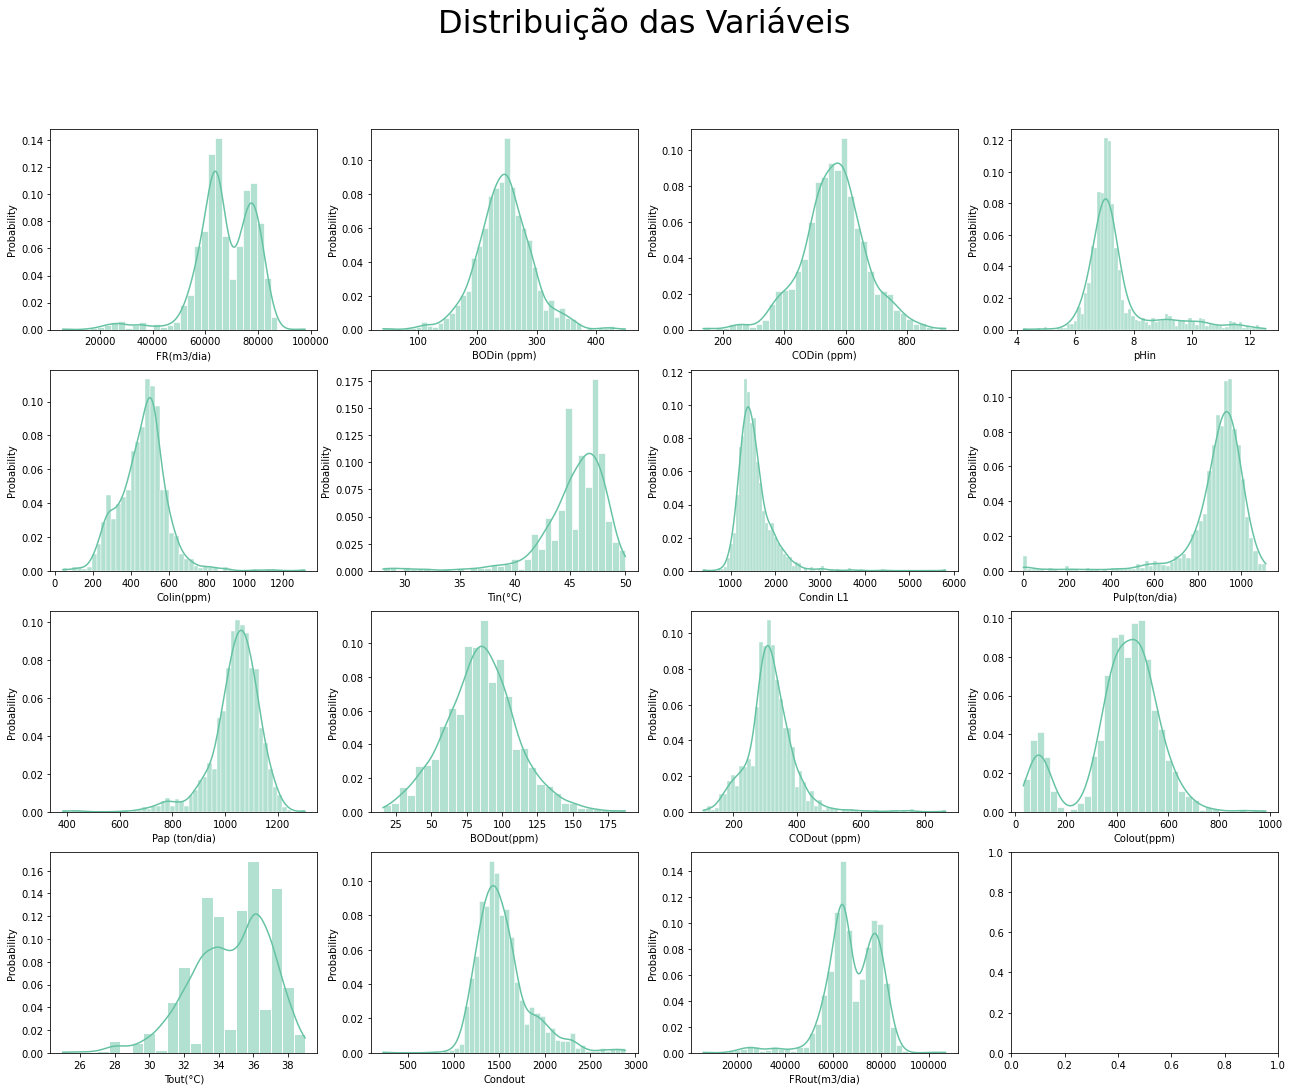

In [30]:
#Plotando grid com histogramas e curvas kde
fig, axs = plt.subplots(4, 4, figsize=(22, 17), sharey=False)
fig.suptitle('Distribuição das Variáveis',fontsize = 32)
sns.set_theme(style="darkgrid",palette="Set2")
sns.histplot(ax = axs[0,0],data=df, x="FR(m3/dia)",  kde = True, stat="probability")
sns.histplot(ax = axs[0,1],data=df, x="BODin (ppm)",  kde = True, stat="probability")
sns.histplot(ax = axs[0,2],data=df, x="CODin (ppm)",  kde = True, stat="probability")
sns.histplot(ax = axs[0,3],data=df, x="pHin",  kde = True, stat="probability")
sns.histplot(ax = axs[1,0],data=df, x="Colin(ppm)",  kde = True, stat="probability")
sns.histplot(ax = axs[1,1],data=df, x="Tin(°C)",  kde = True, stat="probability")
sns.histplot(ax = axs[1,2],data=df, x="Condin L1",  kde = True, stat="probability")
sns.histplot(ax = axs[1,3],data=df, x="Pulp(ton/dia)",  kde = True, stat="probability")
sns.histplot(ax = axs[2,0],data=df, x="Pap (ton/dia)",  kde = True, stat="probability")
sns.histplot(ax = axs[2,1],data=df, x="BODout(ppm)",  kde = True, stat="probability")
sns.histplot(ax = axs[2,2],data=df, x="CODout (ppm)",  kde = True, stat="probability")
sns.histplot(ax = axs[2,3],data=df, x="Colout(ppm)",  kde = True, stat="probability")
sns.histplot(ax = axs[3,0],data=df, x="Tout(°C)",  kde = True, stat="probability")
sns.histplot(ax = axs[3,1],data=df, x="Condout",  kde = True, stat="probability")
sns.histplot(ax = axs[3,2],data=df, x="FRout(m3/dia)",  kde = True, stat="probability")



## **Teste para Distribuição Normal (Quantile - Quantile)**

### **Vazão do Efluente de Entrada (FR(m³/dia))**

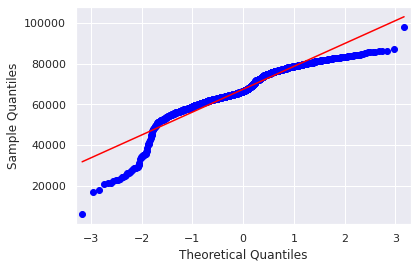

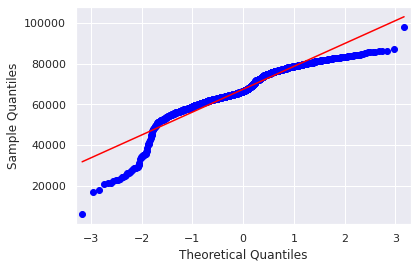

In [31]:
qqplot(df['FR(m3/dia)'], line='s')


Segue a distribuição normal

### **BODin (ppm)**

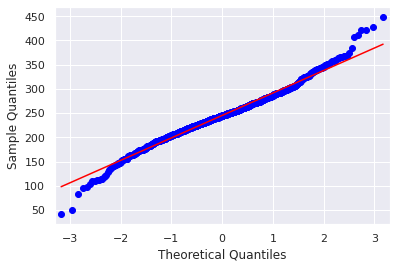

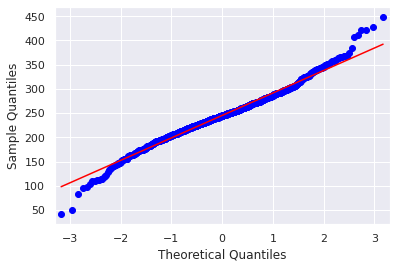

In [32]:
qqplot(df['BODin (ppm)'], line='s')

Segue a normal

### **CODin (ppm)**

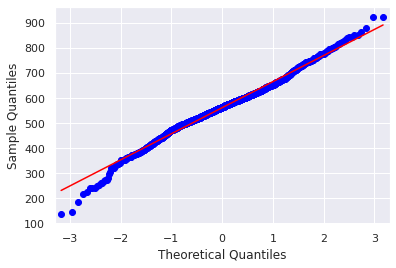

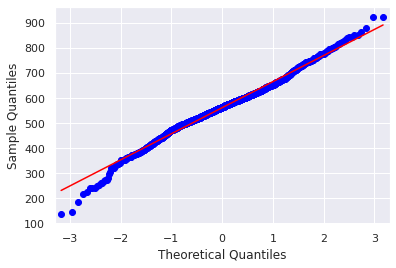

In [33]:
dftemp = df.dropna(subset = ['CODin (ppm)'])
qqplot(dftemp['CODin (ppm)'], line='s')

Segue a normal

### **pHin**

KstestResult(statistic=0.9999877848840747, pvalue=0.0)

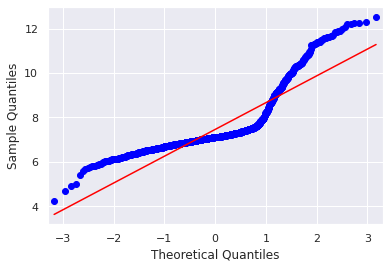

In [34]:
dftemp = df.dropna(subset = ['pHin'])
qqplot(dftemp['pHin'], line='s')
stats.kstest(dftemp['pHin'], 'norm')

Não segue a normal

### **Colin(ppm)**

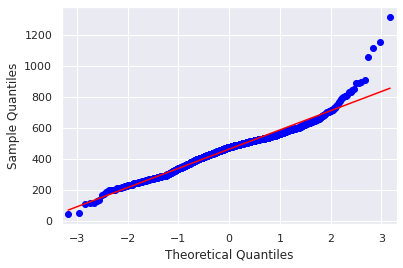

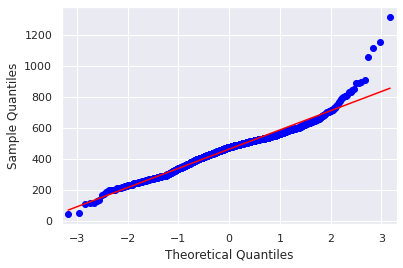

In [35]:

dftemp = df.dropna(subset = ['Colin(ppm)'])
qqplot(dftemp['Colin(ppm)'], line='s')

Segue a normal

### **Tin(°C)**

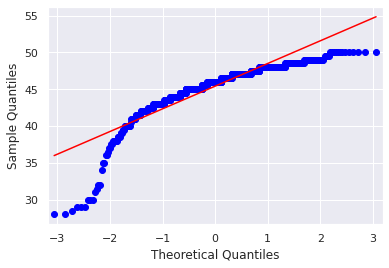

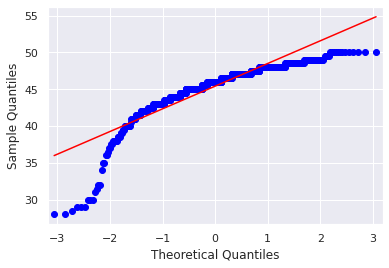

In [36]:
dftemp = df.dropna(subset = ['Tin(°C)'])
qqplot(dftemp['Tin(°C)'], line='s')

Não segue a normal

### **Condin L1**

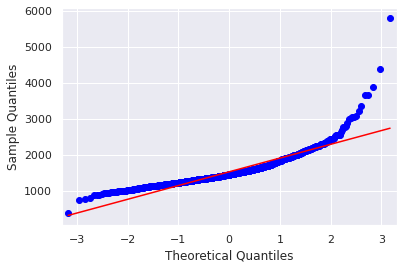

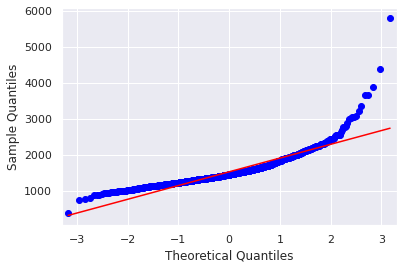

In [37]:
dftemp = df.dropna(subset = ['Condin L1'])
qqplot(dftemp['Condin L1'], line='s')

Segue a normal

### **RF(mm)**

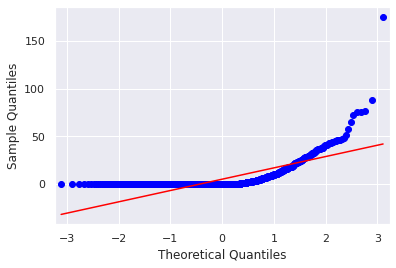

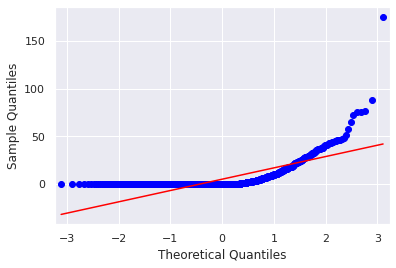

In [38]:
dftemp = df.dropna(subset = ['RF(mm)'])
qqplot(dftemp['RF(mm)'], line='s')

Não segue a normal

### **Pulp(ton/dia)**

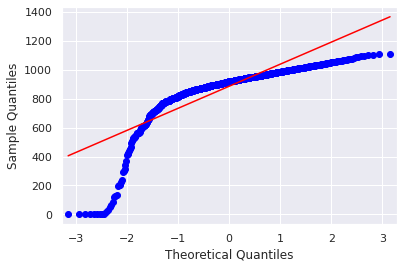

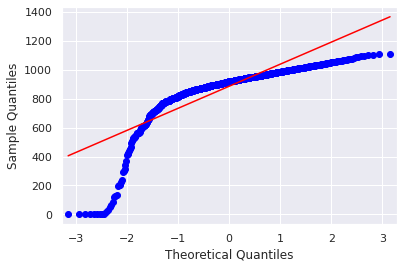

In [39]:

dftemp = df.dropna(subset = ['Pulp(ton/dia)'])
qqplot(dftemp['Pulp(ton/dia)'], line='s')

Não segue a normal

### **Pap (ton/dia)**

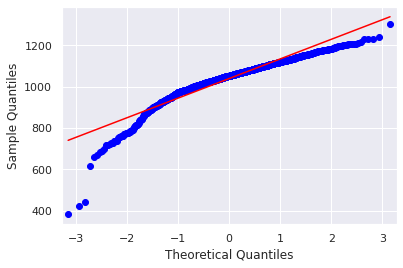

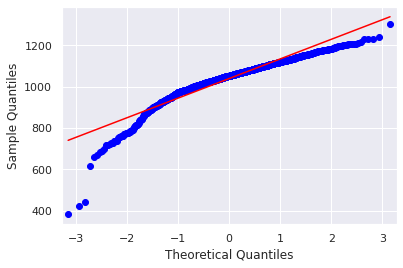

In [40]:

dftemp = df.dropna(subset = ['Pap (ton/dia)'])
qqplot(dftemp['Pap (ton/dia)'], line='s')

Segue a normal

### **BODout(ppm)**

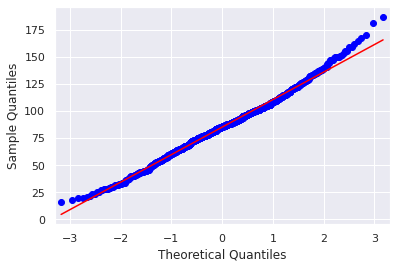

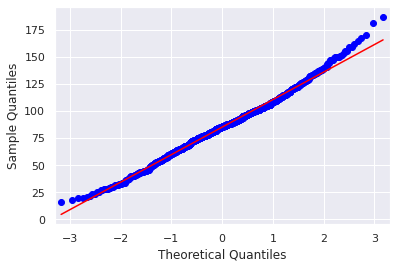

In [41]:
dftemp = df.dropna(subset = ['BODout(ppm)'])
qqplot(dftemp['BODout(ppm)'], line='s')

Segue a normal

### **CODout (ppm)**

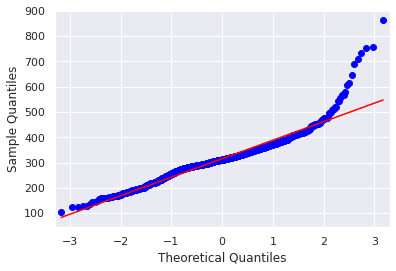

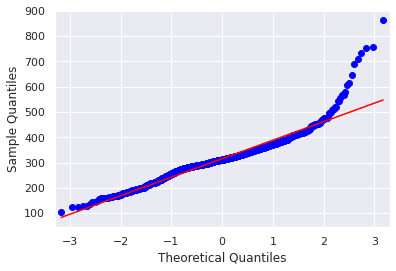

In [42]:
dftemp = df.dropna(subset = ['CODout (ppm)'])
qqplot(dftemp['CODout (ppm)'], line='s')

Segue  a normal

### **Colout(ppm)**

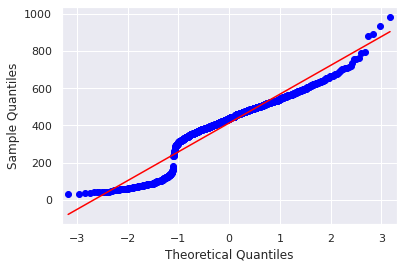

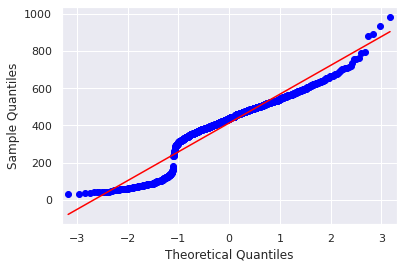

In [43]:
dftemp = df.dropna(subset = ['Colout(ppm)'])
qqplot(dftemp['Colout(ppm)'], line='s')

Não segue a normal

### **Tout(°C)**

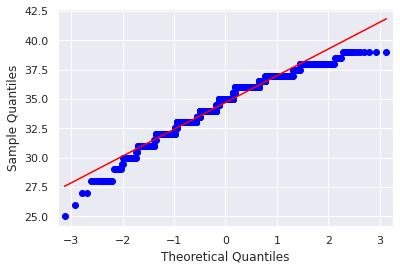

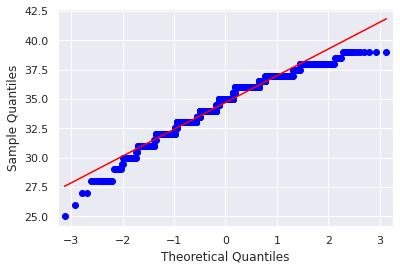

In [44]:
dftemp = df.dropna(subset = ['Tout(°C)'])
qqplot(dftemp['Tout(°C)'], line='s')

Não segue a normal

### **Condout**

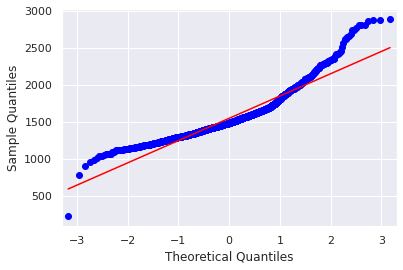

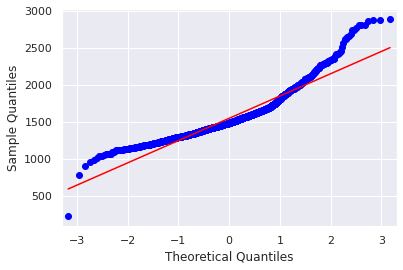

In [45]:
dftemp = df.dropna(subset = ['Condout'])
qqplot(dftemp['Condout'], line='s')

Segue a normal

### **FRout(m3/dia)**

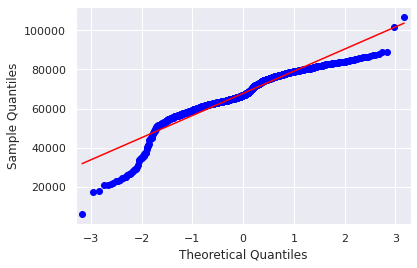

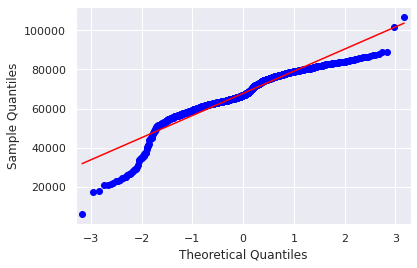

In [46]:
dftemp = df.dropna(subset = ['FRout(m3/dia)'])
qqplot(dftemp['FRout(m3/dia)'], line='s')

Segue a normal

# **INTERVALOS DE CONFIANÇA**

Intervalo de confiança para as variáveis que seguem a distribuição normal. 

### **BODin (ppm)**

In [47]:
# Função que calcula intervalo de confiança para 95%
def mean_confidence_interval(data, confidence=0.95):
     a = 1.0 * np.array(data)
     n = len(a)
     m, se = np.mean(a), stats.sem(a)
     h = se * stats.t.ppf((1 + confidence) / 2., n-1)
     return m, m-h, m+h

ICbodin = mean_confidence_interval(df['BODin (ppm)'])   
print(" Média = ", ICbodin[0], "\n", "Limite Inferior = ",ICbodin[1], "\n" , "Limite Superior = " , ICbodin[2])  

 Média =  245.26066616199847 
 Limite Inferior =  242.75708963104643 
 Limite Superior =  247.76424269295052


### **CODin (ppm)**

In [48]:
# Função que calcula intervalo de confiança para 95%
def mean_confidence_interval(data, confidence=0.95):
     a = 1.0 * np.array(data)
     n = len(a)
     m, se = np.mean(a), stats.sem(a)
     h = se * stats.t.ppf((1 + confidence) / 2., n-1)
     return m, m-h, m+h
dftemp = df.dropna(subset = ['CODin (ppm)'])
ICcodin = mean_confidence_interval(dftemp['CODin (ppm)'])   
print(" Média = ", ICcodin[0], "\n", "Limite Inferior = ",ICcodin[1], "\n" , "Limite Superior = " , ICcodin[2]) 

 Média =  561.9285171102662 
 Limite Inferior =  556.2924621938391 
 Limite Superior =  567.5645720266932


### **Colin(ppm)**

In [49]:
# Função que calcula intervalo de confiança para 95%
def mean_confidence_interval(data, confidence=0.95):
     a = 1.0 * np.array(data)
     n = len(a)
     m, se = np.mean(a), stats.sem(a)
     h = se * stats.t.ppf((1 + confidence) / 2., n-1)
     return m, m-h, m+h
dftemp = df.dropna(subset = ['Colin(ppm)'])
ICcolin = mean_confidence_interval(dftemp['Colin(ppm)'])   
print(" Média = ", ICcolin[0], "\n", "Limite Inferior = ",ICcolin[1], "\n" , "Limite Superior = " , ICcolin[2]) 

 Média =  462.2930903568717 
 Limite Inferior =  455.58563303870676 
 Limite Superior =  469.0005476750366


### **Condin L1**

In [50]:
# Função que calcula intervalo de confiança para 95%
def mean_confidence_interval(data, confidence=0.95):
     a = 1.0 * np.array(data)
     n = len(a)
     m, se = np.mean(a), stats.sem(a)
     h = se * stats.t.ppf((1 + confidence) / 2., n-1)
     return m, m-h, m+h
dftemp = df.dropna(subset = ['Condin L1'])
ICcondin = mean_confidence_interval(dftemp['Condin L1'])   
print(" Média = ", ICcondin[0], "\n", "Limite Inferior = ",ICcondin[1], "\n" , "Limite Superior = " , ICcondin[2]) 

 Média =  1531.4584920030466 
 Limite Inferior =  1510.7742600254828 
 Limite Superior =  1552.1427239806103


### **Pap (ton/dia)**

In [51]:
# Função que calcula intervalo de confiança para 95%
def mean_confidence_interval(data, confidence=0.95):
     a = 1.0 * np.array(data)
     n = len(a)
     m, se = np.mean(a), stats.sem(a)
     h = se * stats.t.ppf((1 + confidence) / 2., n-1)
     return m, m-h, m+h
dftemp = df.dropna(subset = ['Pap (ton/dia)'])
ICpap = mean_confidence_interval(dftemp['Pap (ton/dia)'])   
print(" Média = ", ICpap[0], "\n", "Limite Inferior = ",ICpap[1], "\n" , "Limite Superior = " , ICpap[2]) 

 Média =  1039.9208536782537 
 Limite Inferior =  1034.629051330835 
 Limite Superior =  1045.2126560256725


### **BODout(ppm)**

In [52]:
# Função que calcula intervalo de confiança para 95%
def mean_confidence_interval(data, confidence=0.95):
     a = 1.0 * np.array(data)
     n = len(a)
     m, se = np.mean(a), stats.sem(a)
     h = se * stats.t.ppf((1 + confidence) / 2., n-1)
     return m, m-h, m+h
dftemp = df.dropna(subset = ['BODout(ppm)'])
ICbodout = mean_confidence_interval(dftemp['BODout(ppm)'])   
print(" Média = ", ICbodout[0], "\n", "Limite Inferior = ",ICbodout[1], "\n" , "Limite Superior = " , ICbodout[2]) 

 Média =  85.11632853898561 
 Limite Inferior =  83.74553012420293 
 Limite Superior =  86.4871269537683


### **CODout (ppm)**

In [53]:
# Função que calcula intervalo de confiança para 95%
def mean_confidence_interval(data, confidence=0.95):
     a = 1.0 * np.array(data)
     n = len(a)
     m, se = np.mean(a), stats.sem(a)
     h = se * stats.t.ppf((1 + confidence) / 2., n-1)
     return m, m-h, m+h
dftemp = df.dropna(subset = ['CODout (ppm)'])
ICcodout = mean_confidence_interval(dftemp['CODout (ppm)'])   
print(" Média = ", ICcodout[0], "\n", "Limite Inferior = ",ICcodout[1], "\n" , "Limite Superior = " , ICcodout[2]) 

 Média =  315.455098934551 
 Limite Inferior =  311.48973999289063 
 Limite Superior =  319.4204578762114


### **Condout**

In [54]:
# Função que calcula intervalo de confiança para 95%
def mean_confidence_interval(data, confidence=0.95):
     a = 1.0 * np.array(data)
     n = len(a)
     m, se = np.mean(a), stats.sem(a)
     h = se * stats.t.ppf((1 + confidence) / 2., n-1)
     return m, m-h, m+h
dftemp = df.dropna(subset = ['Condout'])
ICcondout = mean_confidence_interval(dftemp['Condout'])   
print(" Média = ", ICcondout[0], "\n", "Limite Inferior = ",ICcondout[1], "\n" , "Limite Superior = " , ICcondout[2]) 

 Média =  1546.0754573170732 
 Limite Inferior =  1529.7706019864731 
 Limite Superior =  1562.3803126476732


# **CORRELAÇÃO ENTRE VARIÁVEIS**

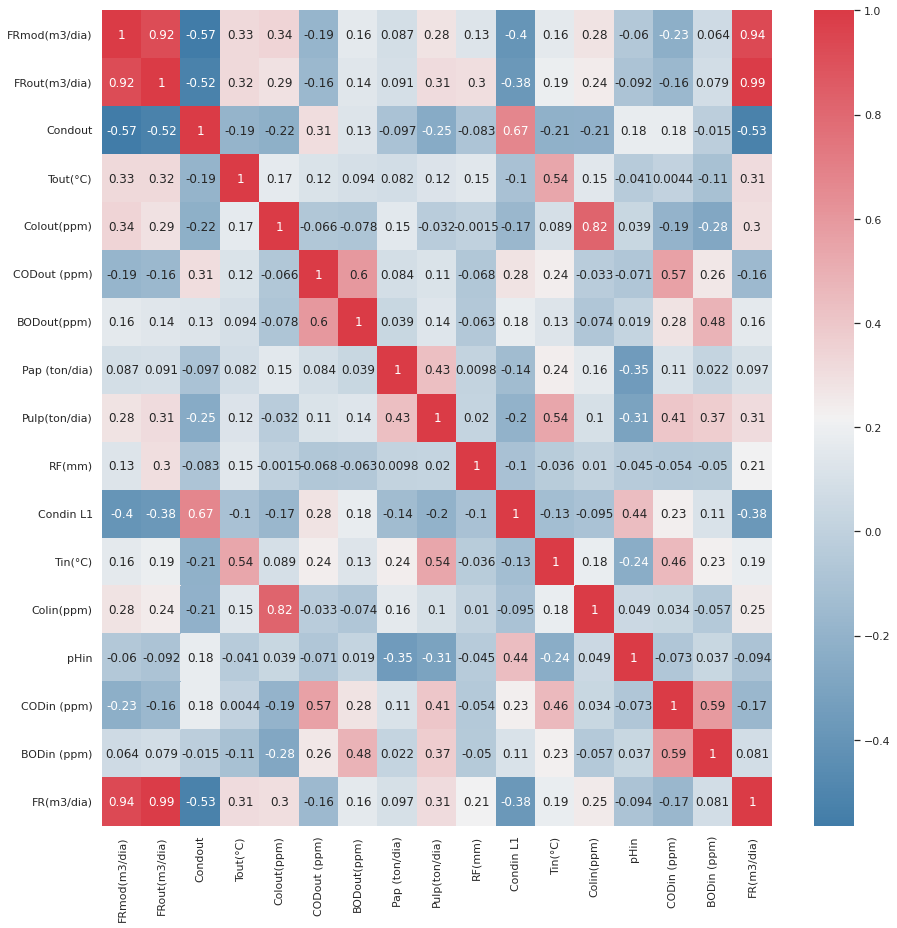

In [55]:
# Cria dataframe para correlação
dfcorr = df.copy(deep=True); 
dfcorr = dfcorr.dropna()
dfcorr.reset_index(drop=True)
dfcorr  = dfcorr.drop(['Datein'], axis = 1)

# Cria matriz de correlação
matrix_corr = dfcorr.corr()
matrix_corr = matrix_corr.loc[:,::-1]
matrix_corr = matrix_corr.iloc[::-1]

# Plota matriz de correlação
fig, axs = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(240, 10, as_cmap = True)
sns.heatmap(matrix_corr,annot = True, cmap=cmap)


Correlações Positivas Significativas de Entrada
*   phIn - CONDin : 0.44
*   CODin - Tin : 0.46
*   Pulp - CODin : 0.41
*   Pulp - Pap : 0.43
*   FRin - Pulp : 0.31
*   Pulp - BODin  : 0.37
*   BODin - Tin : 0.23
*   BODin - CODin: 0.59
*   FRin - Colin: 0.25
*   Tin - Pap : 0.24

Correlações Positivas Significativas de Saída
*   BODout - CODout : 0.6
*   CODout - CONDout  : 0.31
*   FRout - Tou : 0.32

Correlações Negativas Significativas de Entrada
*   FR - CONDin : -0.38
*   pHin - Pulp : -0.35 
*   pHin - Pap: -0.31
*   pHin - Tin: -0.24

Correlações Negativas Significativas de Saída
*   FRout - CONDout :  -0.52
*   COLout - CONDout: -0.22
*   CONDout - Pulp : -0.25






















In [56]:
# Dataframe para plot de gráficos de dispersão
newdt = pd.DataFrame(data = [df['BODin (ppm)'], df['CODin (ppm)'], df['Pulp(ton/dia)'], df['Pap (ton/dia)'], df['Tin(°C)'], df['pHin'], df['Colin(ppm)'], df['Condin L1'], df['FR(m3/dia)']])
newdt = newdt.transpose()

## **Gráfico de Dispersão das Variáveis**


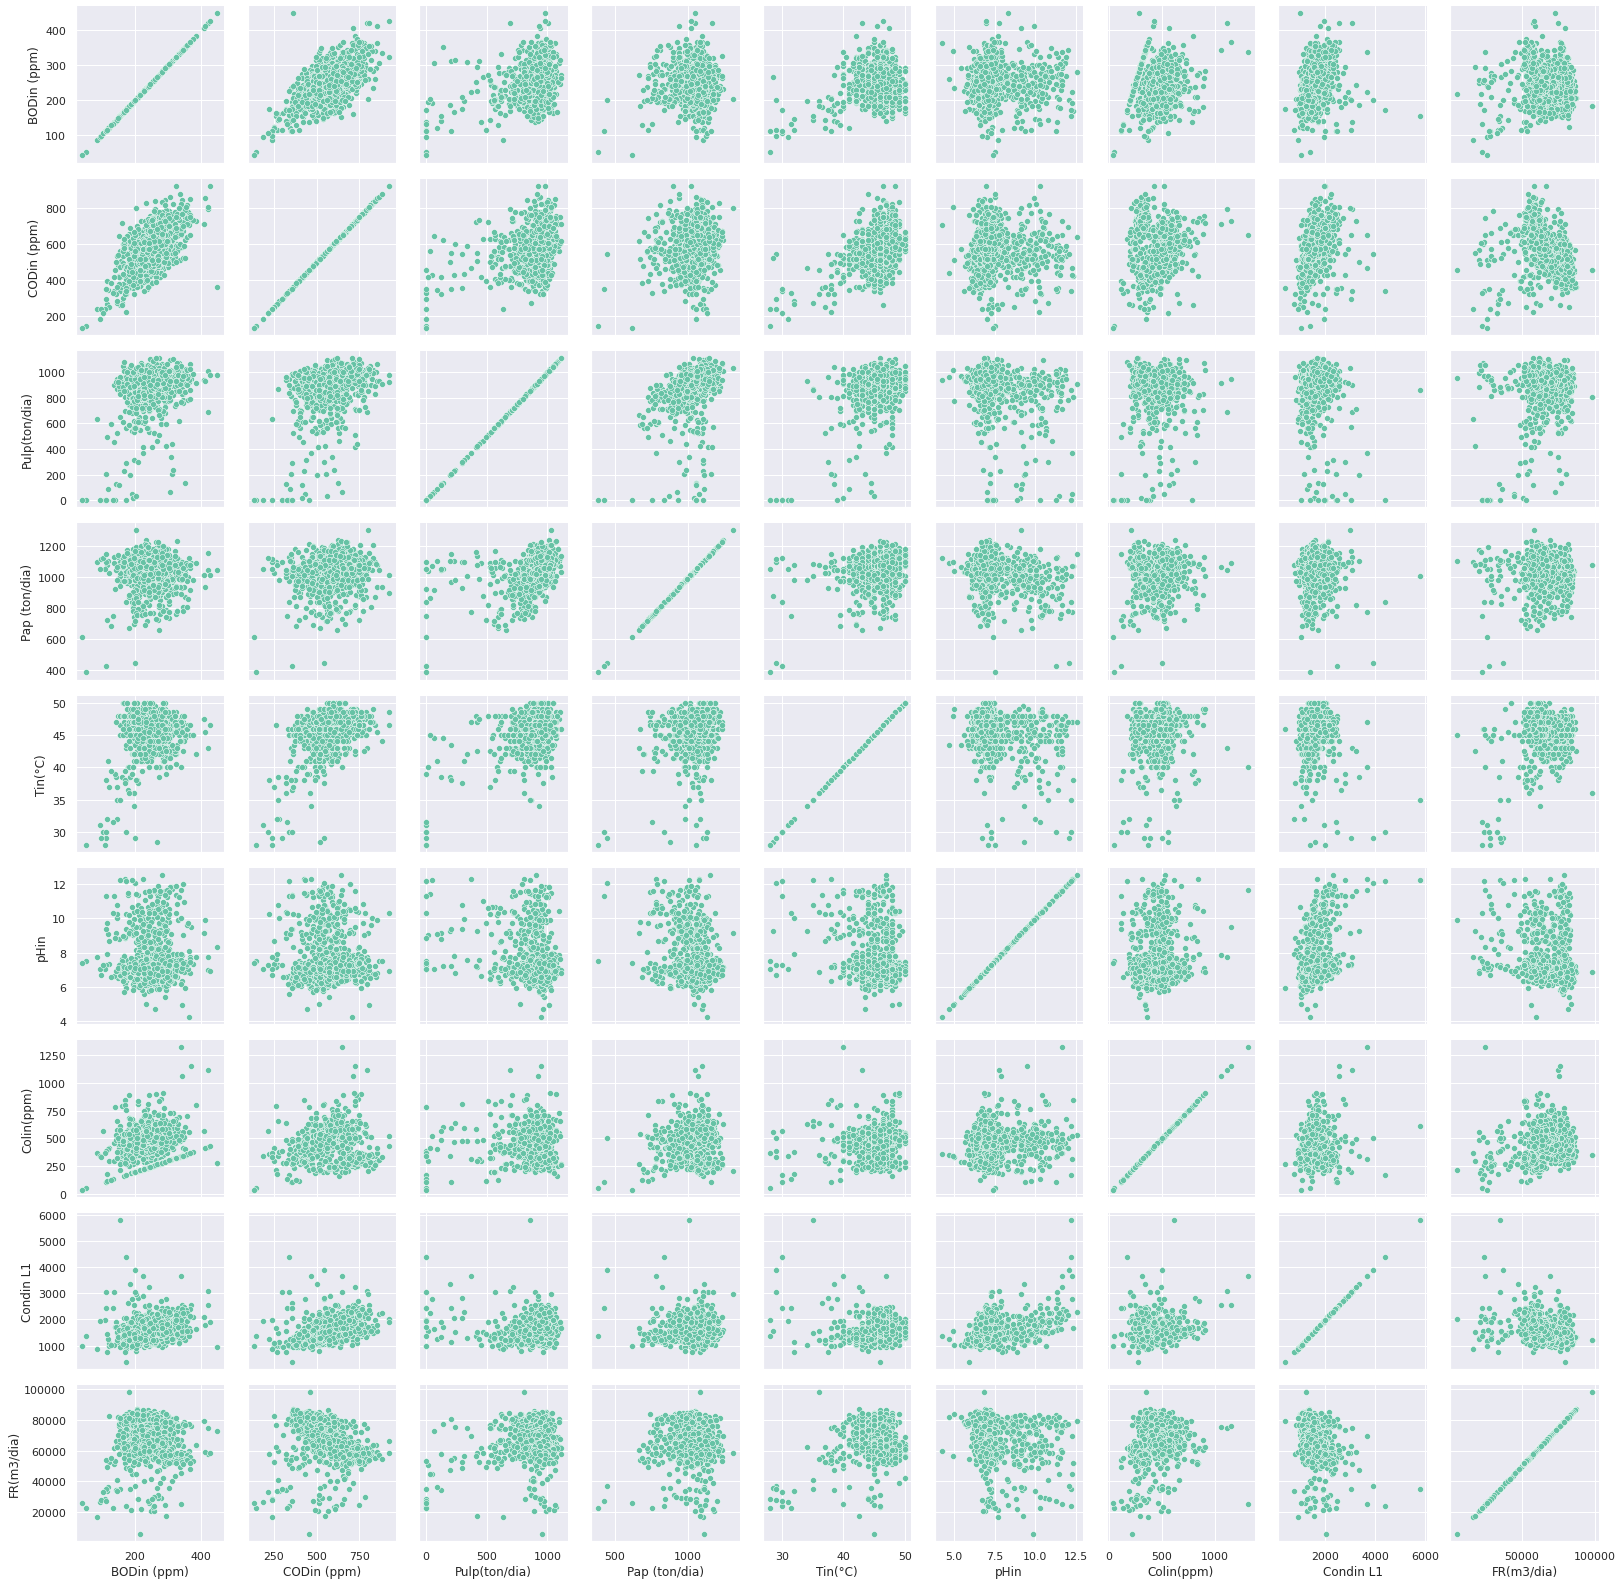

In [57]:
# Plota matriz de gráficos de dispersão
g = sns.PairGrid(newdt)
g.map(sns.scatterplot)

As variáveis mais adequadas para construção do modelo são:

BODin  = CODin + Pulp + Tin + CONDin + FR

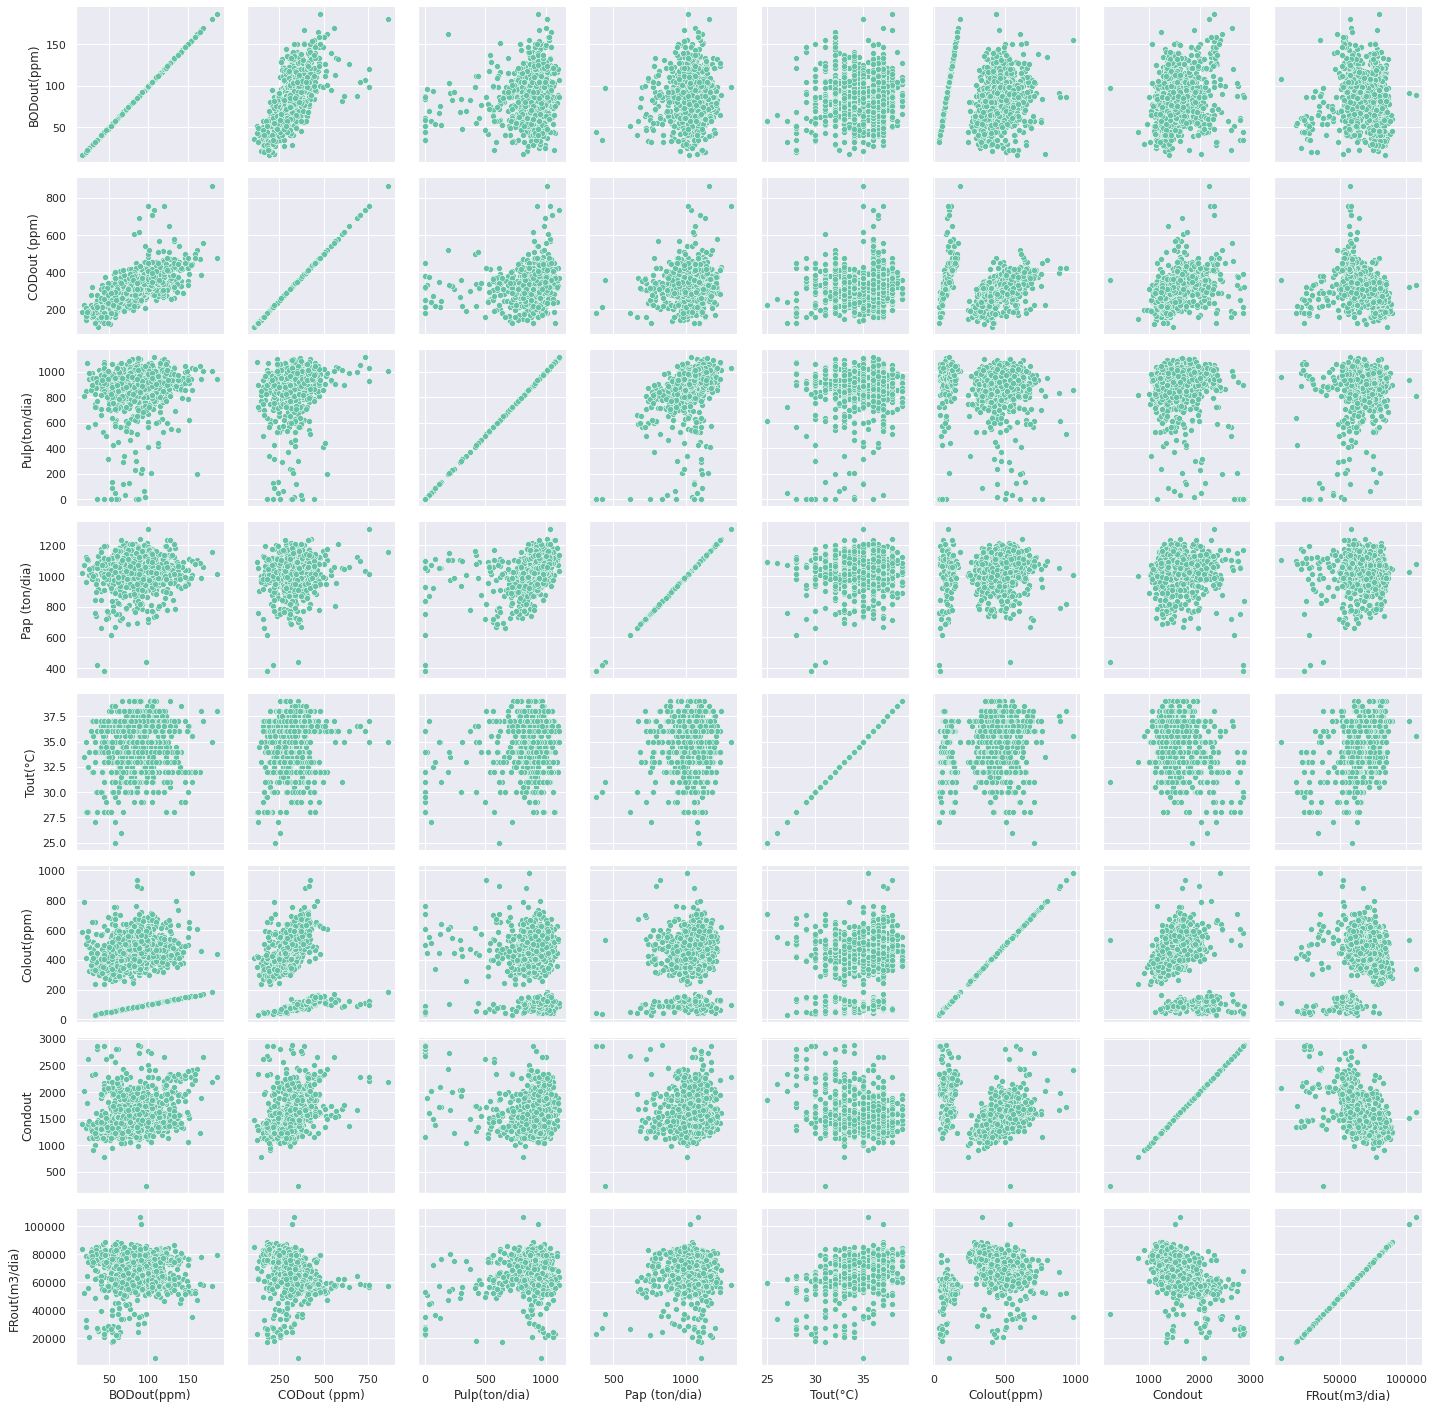

In [58]:
# Cria dataframe para plot de matriz de dispersão
newdt = pd.DataFrame(data = [df['BODout(ppm)'], df['CODout (ppm)'], df['Pulp(ton/dia)'],df['Pap (ton/dia)'], df['Tout(°C)'], df['Colout(ppm)'], df['Condout'],df['FRout(m3/dia)']])
newdt = newdt.transpose()

# Plota matriz de dispersão
g = sns.PairGrid(newdt)
g.map(sns.scatterplot)

As variáveis mais adequadas para construção do modelo são:

BODout = CODout + Pulp + Pap + CONDout + FRout

# **REGRESSÃO LINEAR BODin E CODin**

BODin

O modelo é: BODin (ppm) = 94.361 + 0.26872*CODin


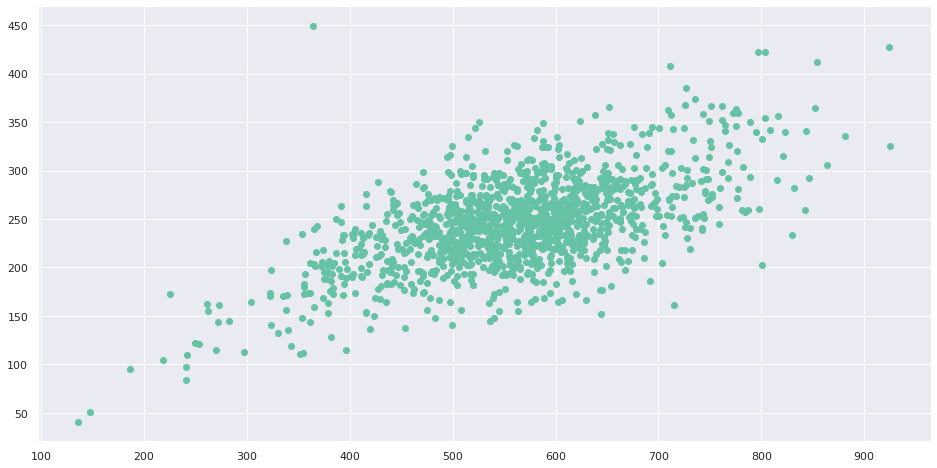

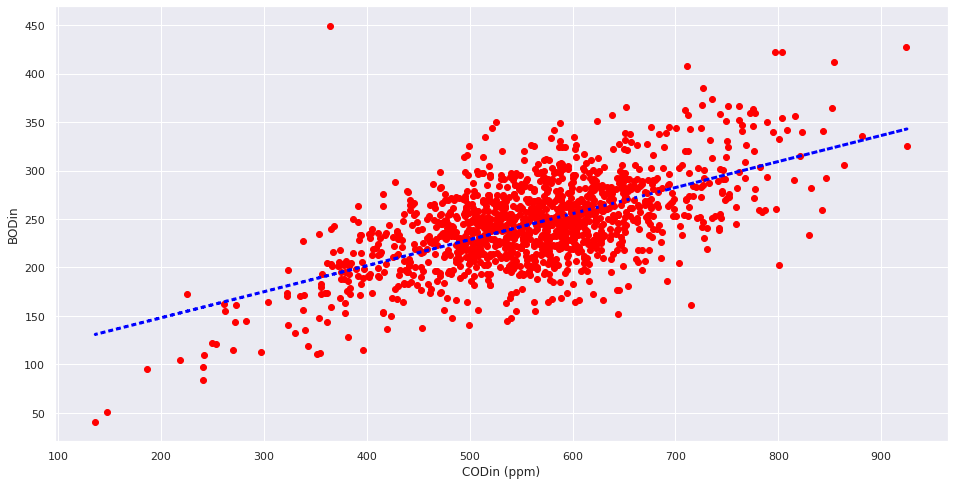

                            OLS Regression Results                            
Dep. Variable:            BODin (ppm)   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     753.9
Date:                Mon, 18 Apr 2022   Prob (F-statistic):          1.55e-131
Time:                        22:27:14   Log-Likelihood:                -6611.8
No. Observations:                1315   AIC:                         1.323e+04
Df Residuals:                    1313   BIC:                         1.324e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          94.3609      5.593     16.871      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [59]:
#PLOTANDO GRÁFICO DE DISPERSÃO BODin X CODin
df = df.dropna(subset = ['BODin (ppm)', 'CODin (ppm)'])
plt.figure(figsize = (16,8))
plt.scatter(df['CODin (ppm)'], df['BODin (ppm)'])

# CALCULANDO O MODELO

X =  df['CODin (ppm)'].values.reshape(-1,1)
y = df['BODin (ppm)'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)


print("O modelo é: BODin (ppm) = {:.5} + {:.5}*CODin".format(reg.intercept_[0], reg.coef_[0][0]))

# PLOTANDO GRÁFICO DE DISPERSÃO COM LINHA DE TENDÊNCIA

f_previsaoes = reg.predict(X)

plt.figure(figsize = (16,8))
plt.scatter(df['CODin (ppm)'], df['BODin (ppm)'], c='red')
plt.plot(df['CODin (ppm)'],f_previsaoes,c='blue',linewidth=3,linestyle=':')

plt.xlabel("CODin (ppm)")
plt.ylabel("BODin")
plt.show()


# CÁLCULO DE P VALOR, ESTATÍSTICA F, R², T, etc...

X = df['CODin (ppm)']
y = df['BODin (ppm)']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())





BODout

O modelo é: BODout(ppm) = 16.6 + 0.21726*CODout


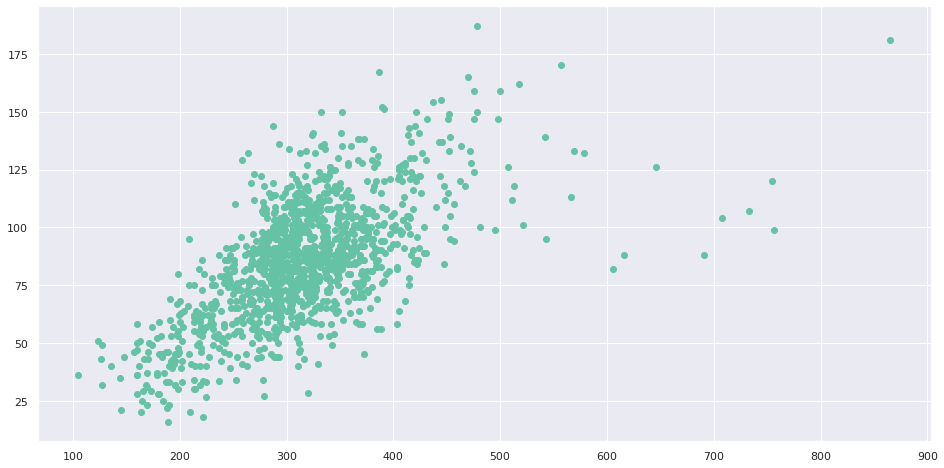

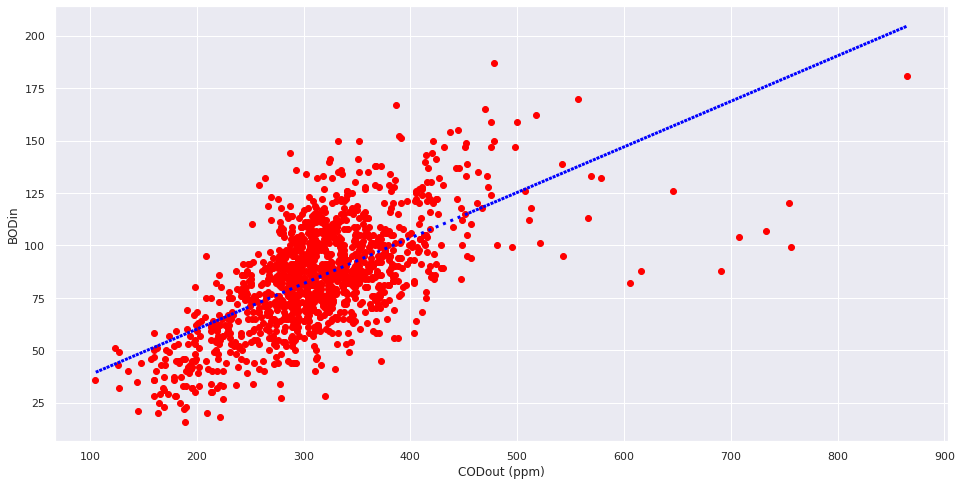

                            OLS Regression Results                            
Dep. Variable:            BODout(ppm)   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     853.1
Date:                Mon, 18 Apr 2022   Prob (F-statistic):          7.19e-145
Time:                        22:27:15   Log-Likelihood:                -5778.7
No. Observations:                1313   AIC:                         1.156e+04
Df Residuals:                    1311   BIC:                         1.157e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           16.6004      2.409      6.892   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [60]:
#PLOTANDO GRÁFICO DE DISPERSÃO BODout X CODout
df = df.dropna(subset = ['BODout(ppm)', 'CODout (ppm)'])
plt.figure(figsize = (16,8))
plt.scatter(x = df['CODout (ppm)'], y = df['BODout(ppm)'])


# CALCULANDO O MODELO

X =  df['CODout (ppm)'].values.reshape(-1,1)
y = df['BODout(ppm)'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)


print("O modelo é: BODout(ppm) = {:.5} + {:.5}*CODout".format(reg.intercept_[0], reg.coef_[0][0]))

# PLOTANDO GRÁFICO DE DISPERSÃO COM LINHA DE TENDÊNCIA

f_previsaoes = reg.predict(X)

plt.figure(figsize = (16,8))
plt.scatter(df['CODout (ppm)'], df['BODout(ppm)'], c='red')
plt.plot(df['CODout (ppm)'],f_previsaoes,c='blue',linewidth=3,linestyle=':')

plt.xlabel("CODout (ppm)")
plt.ylabel("BODin")
plt.show()


# CÁLCULO DE P VALOR, ESTATÍSTICA F, R², T, etc...

X = df['CODout (ppm)']
y = df['BODout(ppm)']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


# **REGRESSÃO MÚLTIPLA**

### REGRESSÃO LINEAR MÚLTIPLA PARA BODin

In [61]:
# CALCULANDO MODELO DE REGRESSÃO LINEAR MÚLTPLA

df= df.dropna(subset=['BODin (ppm)','CODin (ppm)','Pulp(ton/dia)'])

Xs = df.drop(['Datein', 'BODin (ppm)', 'RF(mm)',
              'FRmod(m3/dia)','pHin', 'BODout(ppm)',
              'CODout (ppm)', 'Colout(ppm)', 'Tout(°C)', 'Condout', 
              'FRout(m3/dia)', 'FRmod(m3/dia)', 'FR(m3/dia)',
              'Pap (ton/dia)', 'Colin(ppm)', 'Condin L1','Tin(°C)'],axis = 1)


y = df['BODin (ppm)'].values.reshape(-1,1)



reg = LinearRegression()
reg.fit(Xs, y)

print("==============================================================================")
print("O MODELO é: BODin = {:.5} + {:.5}*CODin + {:.5}*Pulp".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1]))
print("==============================================================================")

# CÁLCULO DE P VALOR, ESTATÍSTICA F, R², T, etc...

X = np.column_stack((df['CODin (ppm)'],df['Pulp(ton/dia)']))
y = df['BODin (ppm)']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

O MODELO é: BODin = 74.822 + 0.24577*CODin + 0.036641*Pulp
                            OLS Regression Results                            
Dep. Variable:            BODin (ppm)   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 18 Apr 2022   Prob (F-statistic):          6.47e-109
Time:                        22:27:15   Log-Likelihood:                -6123.4
No. Observations:                1218   AIC:                         1.225e+04
Df Residuals:                    1215   BIC:                         1.227e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

Segundo o R²ajustado, ~33,5% do nosso processo é explicado pelas variáveis independentes. A estatística F foi o maior valor conseguido, após diversos testes em formato stepwise. Ao olhar a probabilidade da estastística F, é possível rejeitar a hipótese nula de que todos os coeficientes de regressão são nulos, pois ela é muito próxima de 0. Isso conta como um ponto a favor da significância global do modelo. E ao olhar os p-valores das variáveis, existe uma corroboração quanto a afirmação anterior (São menores que 0.05). Durbin-Watson implica em uma variação dos erros constante (homocedasticidade), e é interessante que seu valor esteja entre 1 e 2. Para o caso do modelo, o valor de Durbin-Watson é bem próximo do ideal, tendo diferença na 3 casa decimal, aumentando a confiabilidade do modelo. No intervalo para t tabela com 1217 de grau de liberdade e 95% de confiança, t está entre -1,96 < t < 1,96. Portanto, para as duas variáveis, rejeita-se Ho e se tem um nível. Dessa forma, conclui-se que as variáveis escolhidas são relevantes, porém ainda explicam pouco. Não é pra tanto, já que variáveis de cunho físico-químico significativo, não estão envolvidas no modelo devido a má qualidade que os dados entregam para o modelo. Avaliado a normalidade dos resíduos através da probabilidade de Jarque-Bera, pode-se ver um valor muito pequeno, o que indica uma possível normalidade nos dados.

### Regressão Linear para BODout

In [62]:
# CALCULANDO MODELO DE REGRESSÃO LINEAR MÚLTPLA

df= df.dropna(subset=['BODout(ppm)','CODout (ppm)','CODin (ppm)'])

Xs = df.drop(['Datein', 'RF(mm)', 'FRmod(m3/dia)', 'BODout(ppm)', 'Colout(ppm)', 'Tout(°C)', 'FRout(m3/dia)',
              'FRmod(m3/dia)', 'FR(m3/dia)', 'Pulp(ton/dia)', 'Tin(°C)', 'Colin(ppm)', 'Pap (ton/dia)', 'BODin (ppm)', 'Condout','Condin L1'],axis = 1)


y = df['BODout(ppm)'].values.reshape(-1,1)



reg = LinearRegression()
reg.fit(Xs, y)

print("==============================================================================")
print("O MODELO é: BODout = {:.5} + {:.5}*CODout + {:.5}*CODin".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1]))
print("==============================================================================")

# CÁLCULO DE P VALOR, ESTATÍSTICA F, R², T, etc...

X = np.column_stack((df['CODout (ppm)'], df['CODin (ppm)']))
y = df['BODout(ppm)']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

O MODELO é: BODout = 21.165 + -0.024452*CODout + 1.0015*CODin
                            OLS Regression Results                            
Dep. Variable:            BODout(ppm)   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     342.8
Date:                Mon, 18 Apr 2022   Prob (F-statistic):          9.24e-119
Time:                        22:27:15   Log-Likelihood:                -5336.3
No. Observations:                1218   AIC:                         1.068e+04
Df Residuals:                    1215   BIC:                         1.069e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

Segundo o R²ajustado, ~36% do processo é explicado pelas variáveis independentes. A estatística F foi o maior valor conseguido, após diversos testes em formato stepwise. Ao olhar a probabilidade da estastística F, é possível rejeitar a hipótese nula de que todos os coeficientes de regressão são nulos, pois ela é muito próxima de 0. Isso conta como um ponto a favor da significância global do modelo. E ao olhar os p-valores das variáveis, existe uma corroboração quanto a afirmação anterior (São menores que 0.05). Durbin-Watson implica em uma variação dos erros constante (homocedasticidade), e é interessante que seu valor esteja entre 1 e 2. Para o caso do modelo, o valor de Durbin-Watson está longe do ideal o que diminui a confiabilidade do modelo. No intervalo para t tabela com 1217 de grau de liberdade e 95% de confiança, t está entre -1,96 < t < 1,96. Portanto, para as duas variáveis, rejeita-se Ho. Avaliado a normalidade dos resíduos através da probabilidade de Jarque-Bera, pode-se ver um valor relativamente grande em relação ao modelo anterior, o que indica uma possível falta de normalidade nos dados. Portanto, conclui-se que o modelo não é o mais adequado para a predição.